# **Project PPT-**
https://www.canva.com/design/DAGyfYfhqRI/1UpuvepRAagunXkZwD3Xvw/edit?utm_content=DAGyfYfhqRI&utm_campaign=designshare&utm_medium=link2&utm_source=sharebutton

# Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

import warnings
warnings.filterwarnings("ignore")


# **Data Pre-Processing**

In [ ]:
# Load dataset
data = pd.read_csv("/content/day.csv")
data.head()

instant      dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  2011-01-01       1   0     1        0        6           0   
1        2  2011-01-02       1   0     1        0        0           0   
2        3  2011-01-03       1   0     1        0        1           1   
3        4  2011-01-04       1   0     1        0        2           1   
4        5  2011-01-05       1   0     1        0        3           1   

   weathersit      temp     atemp       hum  windspeed  casual  registered  \
0           2  0.344167  0.363625  0.805833   0.160446     331         654   
1           2  0.363478  0.353739  0.696087   0.248539     131         670   
2           1  0.196364  0.189405  0.437273   0.248309     120        1229   
3           1  0.200000  0.212122  0.590435   0.160296     108        1454   
4           1  0.226957  0.229270  0.436957   0.186900      82        1518   

    cnt  
0   985  
1   801  
2  1349  
3  1562  
4  1600

In [ ]:
print(data.info())
print(data.shape)
print(data.isnull().sum())
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB
None
(731, 16)
instant       0
dteday        0
season        0
yr            0
mnth          

count         mean          std        min          25%  \
instant     731.0   366.000000   211.165812   1.000000   183.500000   
season      731.0     2.496580     1.110807   1.000000     2.000000   
yr          731.0     0.500684     0.500342   0.000000     0.000000   
mnth        731.0     6.519836     3.451913   1.000000     4.000000   
holiday     731.0     0.028728     0.167155   0.000000     0.000000   
weekday     731.0     2.997264     2.004787   0.000000     1.000000   
workingday  731.0     0.683995     0.465233   0.000000     0.000000   
weathersit  731.0     1.395349     0.544894   1.000000     1.000000   
temp        731.0     0.495385     0.183051   0.059130     0.337083   
atemp       731.0     0.474354     0.162961   0.079070     0.337842   
hum         731.0     0.627894     0.142429   0.000000     0.520000   
windspeed   731.0     0.190486     0.077498   0.022392     0.134950   
casual      731.0   848.176471   686.622488   2.000000   315.500000   
registered  731.0  3656.172367  1560.256377  20.000000  2497.000000   
cnt         731.0  4504.348837  1937.211452  22.000000  3152.000000   

                    50%          75%          max  
instant      366.000000   548.500000   731.000000  
season         3.000000     3.000000     4.000000  
yr             1.000000     1.000000     1.000000  
mnth           7.000000    10.000000    12.000000  
holiday        0.000000     0.000000     1.000000  
weekday        3.000000     5.000000     6.000000  
workingday     1.000000     1.000000     1.000000  
weathersit     1.000000     2.000000     3.000000  
temp           0.498333     0.655417     0.861667  
atemp          0.486733     0.608602     0.840896  
hum            0.626667     0.730209     0.972500  
windspeed      0.180975     0.233214     0.507463  
casual       713.000000  1096.000000  3410.000000  
registered  3662.000000  4776.500000  6946.000000  
cnt         4548.000000  5956.000000  8714.000000

In [ ]:
data.rename(columns={
    'yr': 'year',
    'dteday': 'date',
    'mnth': 'month',
    'temp': 'temperature',
    'atemp': 'atemperature',
    'hum': 'humidity',
    'cnt': 'count'
}, inplace=True)

data.head()


instant        date  season  year  month  holiday  weekday  workingday  \
0        1  2011-01-01       1     0      1        0        6           0   
1        2  2011-01-02       1     0      1        0        0           0   
2        3  2011-01-03       1     0      1        0        1           1   
3        4  2011-01-04       1     0      1        0        2           1   
4        5  2011-01-05       1     0      1        0        3           1   

   weathersit  temperature  atemperature  humidity  windspeed  casual  \
0           2     0.344167      0.363625  0.805833   0.160446     331   
1           2     0.363478      0.353739  0.696087   0.248539     131   
2           1     0.196364      0.189405  0.437273   0.248309     120   
3           1     0.200000      0.212122  0.590435   0.160296     108   
4           1     0.226957      0.229270  0.436957   0.186900      82   

   registered  count  
0         654    985  
1         670    801  
2        1229   1349  
3        1454   1562  
4        1518   1600

In [ ]:
# Map season and weather codes to names
season_mapping = {1: 'winter', 2: 'spring', 3: 'summer', 4: 'fall'}
weather_mapping = {
    1: 'Clear',
    2: 'Mist + Cloudy',
    3: 'Light Snow/Rain',
    4: 'Heavy Rain/Snow'
}

if 'season' in data.columns:
    data['season_name'] = data['season'].map(season_mapping)
if 'weathersit' in data.columns:
    data['weather_name'] = data['weathersit'].map(weather_mapping)

data.head()

instant        date  season  year  month  holiday  weekday  workingday  \
0        1  2011-01-01       1     0      1        0        6           0   
1        2  2011-01-02       1     0      1        0        0           0   
2        3  2011-01-03       1     0      1        0        1           1   
3        4  2011-01-04       1     0      1        0        2           1   
4        5  2011-01-05       1     0      1        0        3           1   

   weathersit  temperature  atemperature  humidity  windspeed  casual  \
0           2     0.344167      0.363625  0.805833   0.160446     331   
1           2     0.363478      0.353739  0.696087   0.248539     131   
2           1     0.196364      0.189405  0.437273   0.248309     120   
3           1     0.200000      0.212122  0.590435   0.160296     108   
4           1     0.226957      0.229270  0.436957   0.186900      82   

   registered  count season_name   weather_name  
0         654    985      winter  Mist + Cloudy  
1         670    801      winter  Mist + Cloudy  
2        1229   1349      winter          Clear  
3        1454   1562      winter          Clear  
4        1518   1600      winter          Clear

In [ ]:
print(data.info())
print(data.shape)
print(data.isnull().sum())
data.describe().T

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   instant       731 non-null    int64  
 1   date          731 non-null    object 
 2   season        731 non-null    int64  
 3   year          731 non-null    int64  
 4   month         731 non-null    int64  
 5   holiday       731 non-null    int64  
 6   weekday       731 non-null    int64  
 7   workingday    731 non-null    int64  
 8   weathersit    731 non-null    int64  
 9   temperature   731 non-null    float64
 10  atemperature  731 non-null    float64
 11  humidity      731 non-null    float64
 12  windspeed     731 non-null    float64
 13  casual        731 non-null    int64  
 14  registered    731 non-null    int64  
 15  count         731 non-null    int64  
 16  season_name   731 non-null    object 
 17  weather_name  731 non-null    object 
dtypes: float64(4), int64(11), obje

count         mean          std        min          25%  \
instant       731.0   366.000000   211.165812   1.000000   183.500000   
season        731.0     2.496580     1.110807   1.000000     2.000000   
year          731.0     0.500684     0.500342   0.000000     0.000000   
month         731.0     6.519836     3.451913   1.000000     4.000000   
holiday       731.0     0.028728     0.167155   0.000000     0.000000   
weekday       731.0     2.997264     2.004787   0.000000     1.000000   
workingday    731.0     0.683995     0.465233   0.000000     0.000000   
weathersit    731.0     1.395349     0.544894   1.000000     1.000000   
temperature   731.0     0.495385     0.183051   0.059130     0.337083   
atemperature  731.0     0.474354     0.162961   0.079070     0.337842   
humidity      731.0     0.627894     0.142429   0.000000     0.520000   
windspeed     731.0     0.190486     0.077498   0.022392     0.134950   
casual        731.0   848.176471   686.622488   2.000000   315.500000   
registered    731.0  3656.172367  1560.256377  20.000000  2497.000000   
count         731.0  4504.348837  1937.211452  22.000000  3152.000000   

                      50%          75%          max  
instant        366.000000   548.500000   731.000000  
season           3.000000     3.000000     4.000000  
year             1.000000     1.000000     1.000000  
month            7.000000    10.000000    12.000000  
holiday          0.000000     0.000000     1.000000  
weekday          3.000000     5.000000     6.000000  
workingday       1.000000     1.000000     1.000000  
weathersit       1.000000     2.000000     3.000000  
temperature      0.498333     0.655417     0.861667  
atemperature     0.486733     0.608602     0.840896  
humidity         0.626667     0.730209     0.972500  
windspeed        0.180975     0.233214     0.507463  
casual         713.000000  1096.000000  3410.000000  
registered    3662.000000  4776.500000  6946.000000  
count         4548.000000  5956.000000  8714.000000

In [ ]:
data['quarter'] = data['month'].apply(lambda m: f"Q{(m-1)//3 + 1}")

In [ ]:
data['weekday_num'] = data['weekday'].apply(lambda x: 1 if x in [0,1,2,3,4] else 0)

In [ ]:
# Drop leakage columns
drop_cols = ['instant','date','casual','registered','weathersit','season']
data = data.drop(columns=[c for c in drop_cols if c in data.columns])

data.head()

year  month  holiday  weekday  workingday  temperature  atemperature  \
0     0      1        0        6           0     0.344167      0.363625   
1     0      1        0        0           0     0.363478      0.353739   
2     0      1        0        1           1     0.196364      0.189405   
3     0      1        0        2           1     0.200000      0.212122   
4     0      1        0        3           1     0.226957      0.229270   

   humidity  windspeed  count season_name   weather_name quarter  weekday_num  
0  0.805833   0.160446    985      winter  Mist + Cloudy      Q1            0  
1  0.696087   0.248539    801      winter  Mist + Cloudy      Q1            1  
2  0.437273   0.248309   1349      winter          Clear      Q1            1  
3  0.590435   0.160296   1562      winter          Clear      Q1            1  
4  0.436957   0.186900   1600      winter          Clear      Q1            1

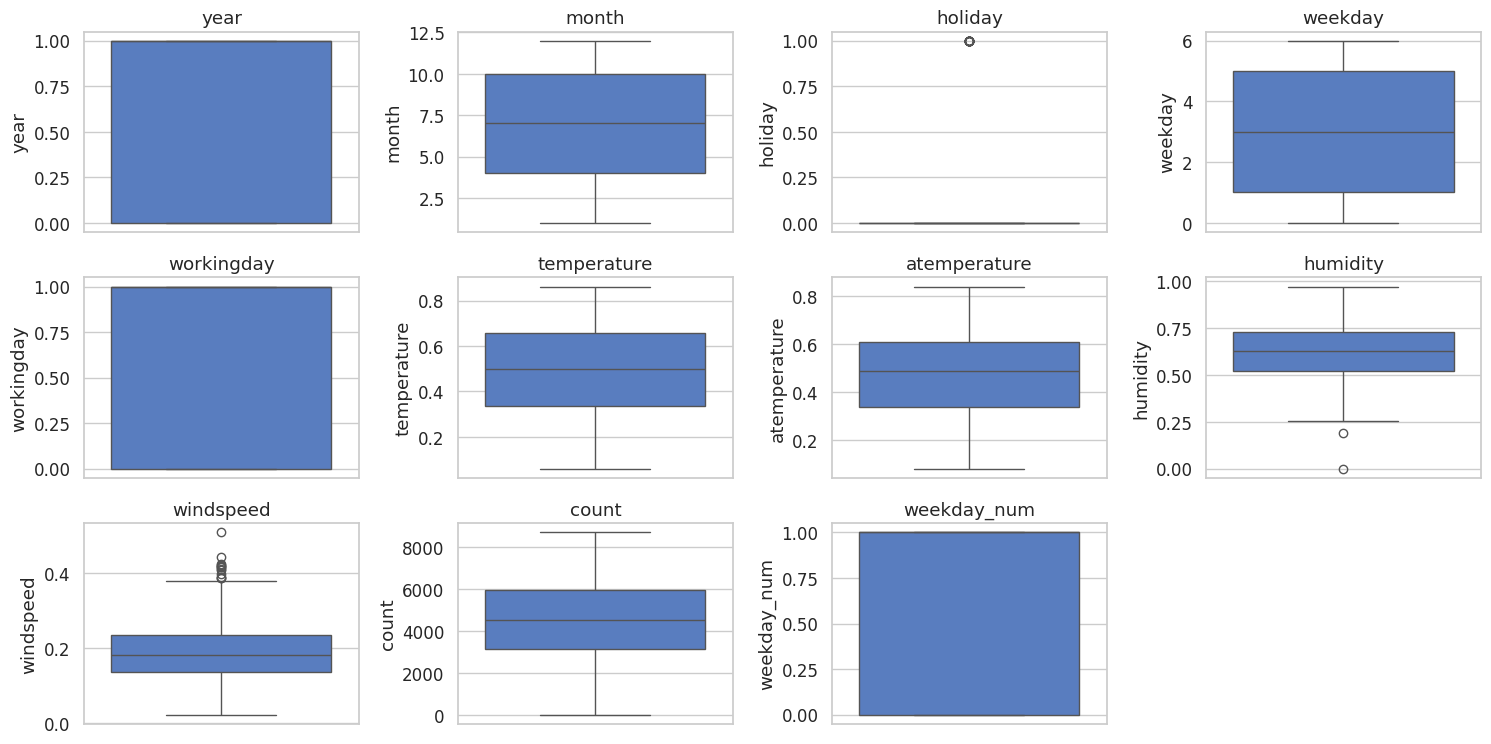

In [ ]:
# Check for outliers using boxplot before removing outliers
numerical_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(4, 4, i + 1)  # Adjusted grid to 4x4
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
print("Before Removing Outliers:",data.shape)

Before Removing Outliers: (731, 14)


In [ ]:
# Check for outliers using IQR
numerical_cols = data.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Number of outliers in '{col}': {len(outliers)}")

Number of outliers in 'year': 0
Number of outliers in 'month': 0
Number of outliers in 'holiday': 21
Number of outliers in 'weekday': 0
Number of outliers in 'workingday': 0
Number of outliers in 'temperature': 0
Number of outliers in 'atemperature': 0
Number of outliers in 'humidity': 2
Number of outliers in 'windspeed': 13
Number of outliers in 'count': 0
Number of outliers in 'weekday_num': 0


In [ ]:
# Remove outliers using IQR
numerical_cols = data.select_dtypes(include=np.number).columns

for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]

# Recheck for outliers using IQR
print("Rechecking for outliers after removal:")
for col in numerical_cols:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)]
    print(f"Number of outliers in '{col}': {len(outliers)}")

Rechecking for outliers after removal:
Number of outliers in 'year': 0
Number of outliers in 'month': 0
Number of outliers in 'holiday': 0
Number of outliers in 'weekday': 0
Number of outliers in 'workingday': 0
Number of outliers in 'temperature': 0
Number of outliers in 'atemperature': 0
Number of outliers in 'humidity': 0
Number of outliers in 'windspeed': 3
Number of outliers in 'count': 0
Number of outliers in 'weekday_num': 0


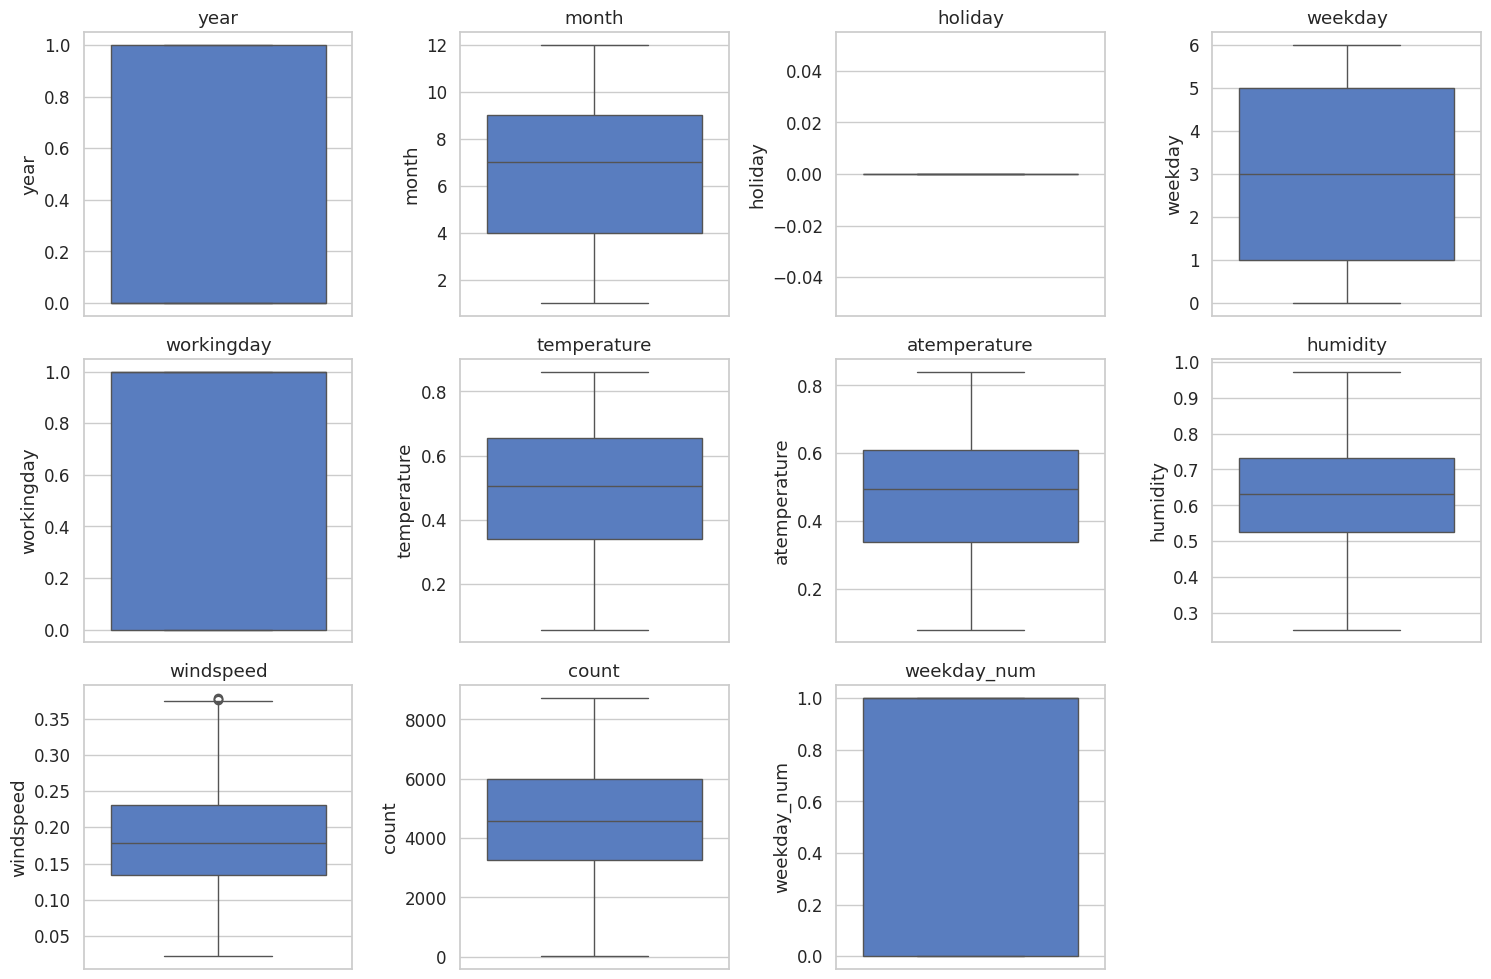

In [ ]:
# Check for outliers using boxplot after removing outliers
numerical_cols = data.select_dtypes(include=np.number).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 4, i + 1)
    sns.boxplot(y=data[col])
    plt.title(col)

plt.tight_layout()
plt.show()

In [ ]:
print("After Removing Outliers:",data.shape)

After Removing Outliers: (696, 14)


In [ ]:
object_cols = data.select_dtypes(include='object').columns
data = pd.get_dummies(data, columns=object_cols, drop_first=True)

In [ ]:
data.head()

year  month  holiday  weekday  workingday  temperature  atemperature  \
0     0      1        0        6           0     0.344167      0.363625   
1     0      1        0        0           0     0.363478      0.353739   
2     0      1        0        1           1     0.196364      0.189405   
3     0      1        0        2           1     0.200000      0.212122   
4     0      1        0        3           1     0.226957      0.229270   

   humidity  windspeed  count  weekday_num  season_name_spring  \
0  0.805833   0.160446    985            0               False   
1  0.696087   0.248539    801            1               False   
2  0.437273   0.248309   1349            1               False   
3  0.590435   0.160296   1562            1               False   
4  0.436957   0.186900   1600            1               False   

   season_name_summer  season_name_winter  weather_name_Light Snow/Rain  \
0               False                True                         False   
1               False                True                         False   
2               False                True                         False   
3               False                True                         False   
4               False                True                         False   

   weather_name_Mist + Cloudy  quarter_Q2  quarter_Q3  quarter_Q4  
0                        True       False       False       False  
1                        True       False       False       False  
2                       False       False       False       False  
3                       False       False       False       False  
4                       False       False       False       False

In [ ]:
for col in data.select_dtypes(include='bool').columns:
    data[col] = data[col].astype(int)

In [ ]:
data.head()

year  month  holiday  weekday  workingday  temperature  atemperature  \
0     0      1        0        6           0     0.344167      0.363625   
1     0      1        0        0           0     0.363478      0.353739   
2     0      1        0        1           1     0.196364      0.189405   
3     0      1        0        2           1     0.200000      0.212122   
4     0      1        0        3           1     0.226957      0.229270   

   humidity  windspeed  count  weekday_num  season_name_spring  \
0  0.805833   0.160446    985            0                   0   
1  0.696087   0.248539    801            1                   0   
2  0.437273   0.248309   1349            1                   0   
3  0.590435   0.160296   1562            1                   0   
4  0.436957   0.186900   1600            1                   0   

   season_name_summer  season_name_winter  weather_name_Light Snow/Rain  \
0                   0                   1                             0   
1                   0                   1                             0   
2                   0                   1                             0   
3                   0                   1                             0   
4                   0                   1                             0   

   weather_name_Mist + Cloudy  quarter_Q2  quarter_Q3  quarter_Q4  
0                           1           0           0           0  
1                           1           0           0           0  
2                           0           0           0           0  
3                           0           0           0           0  
4                           0           0           0           0

In [ ]:
data.shape

(696, 19)

# **EDA(Expolatary Data Analysis)**

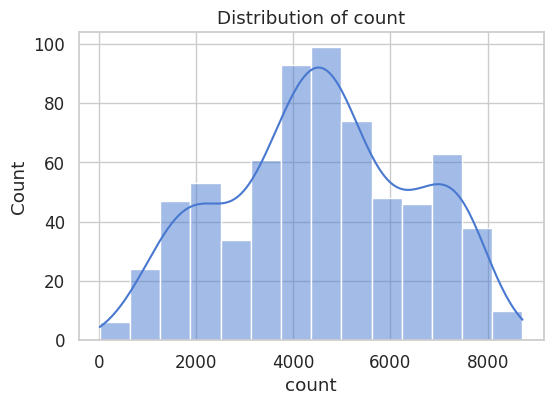

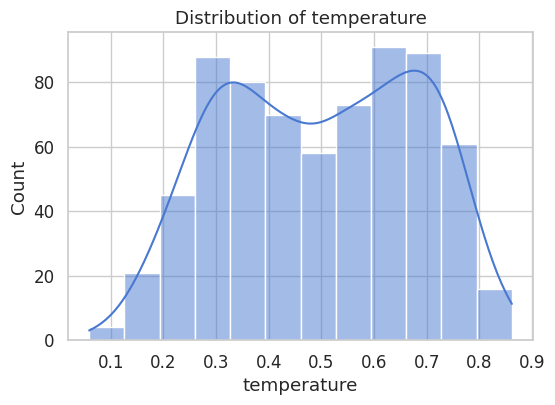

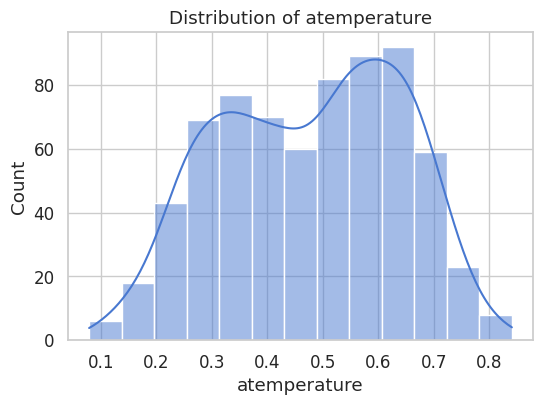

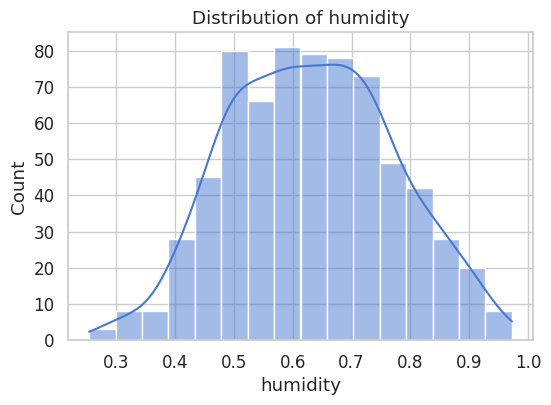

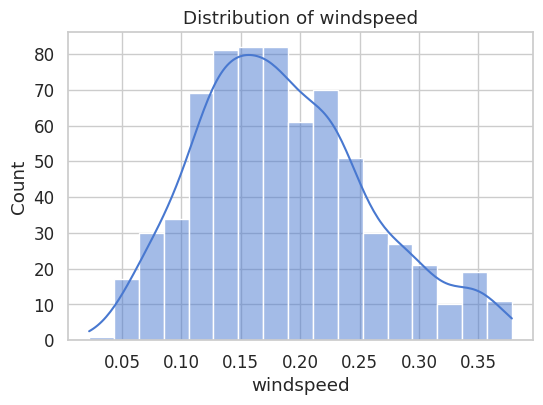

In [ ]:
num_cols = ['count','temperature', 'atemperature', 'humidity', 'windspeed']

for col in num_cols:
    plt.figure(figsize=(6,4))
    sns.histplot(data[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.show()

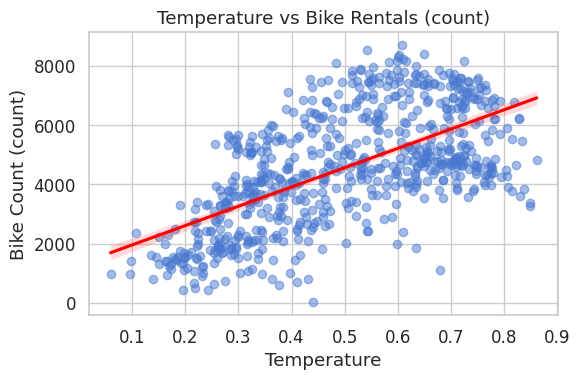

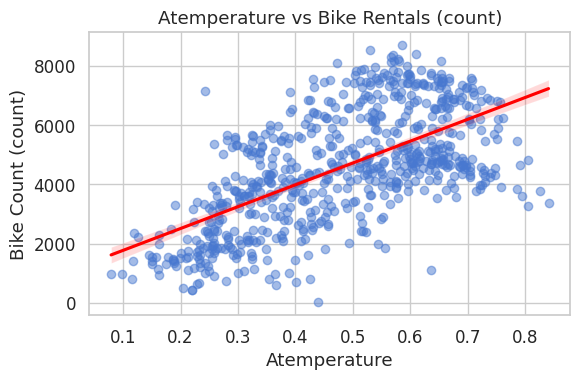

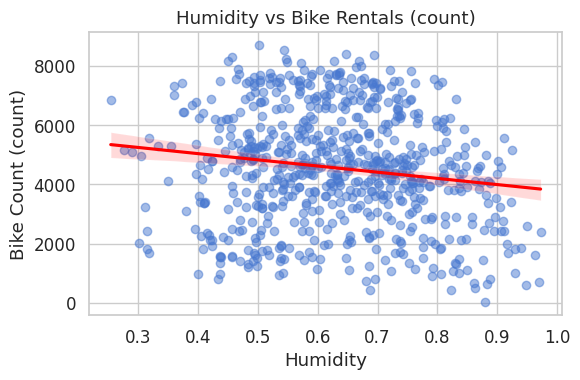

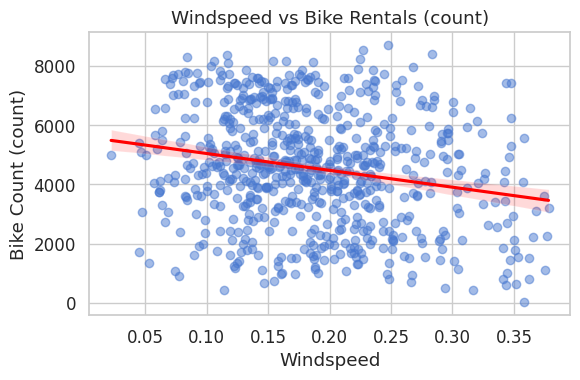

In [ ]:
features = ['temperature', 'atemperature', 'humidity', 'windspeed']
for col in features:
    plt.figure(figsize=(6, 4))
    sns.regplot(x=data[col], y=data['count'], scatter_kws={'alpha':0.5}, line_kws={"color":"red"})
    plt.title(f"{col.capitalize()} vs Bike Rentals (count)")
    plt.xlabel(col.capitalize())
    plt.ylabel("Bike Count (count)")
    plt.grid(True)
    plt.tight_layout()
    plt.show()

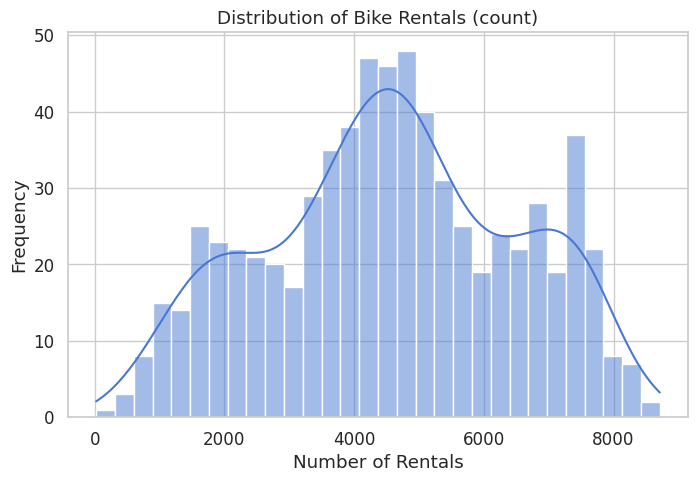

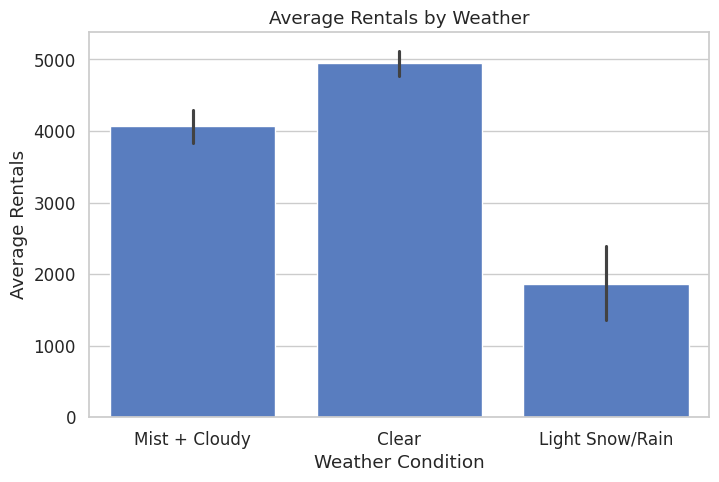

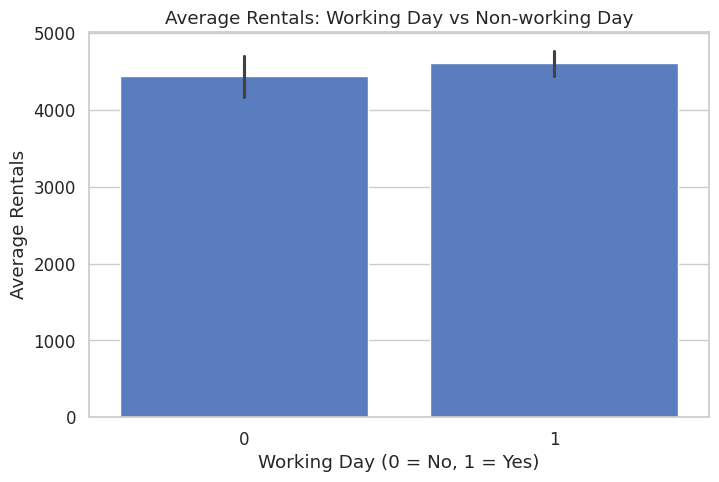

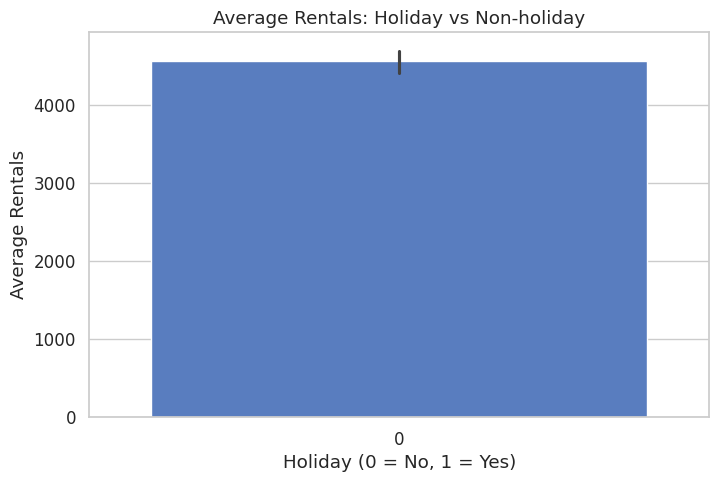

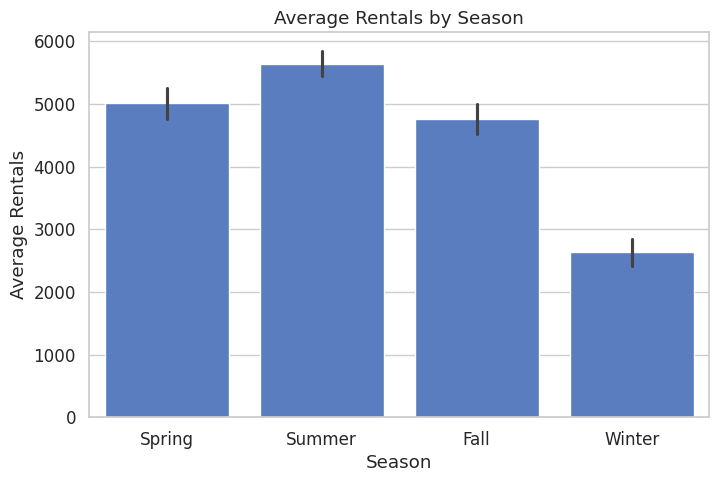

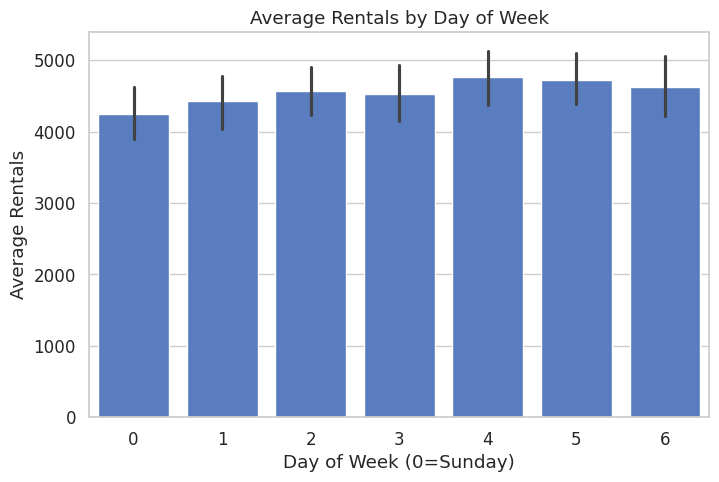

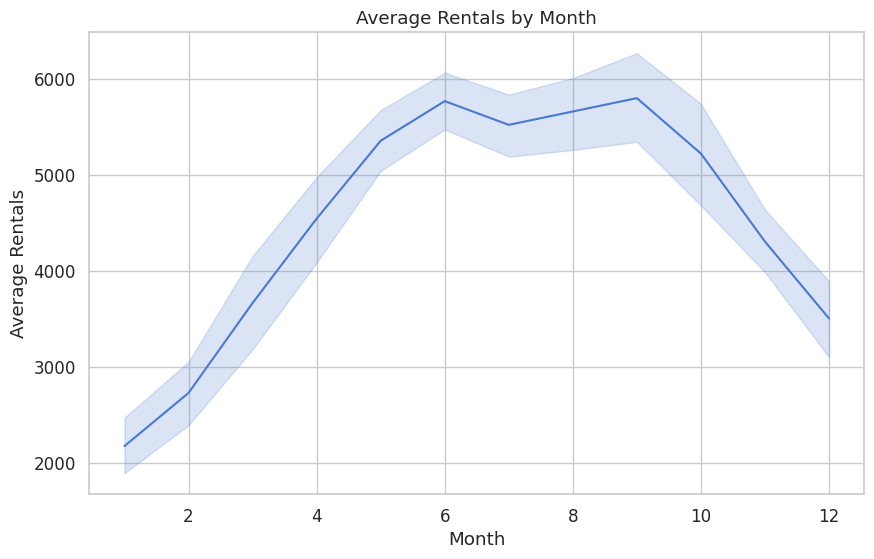

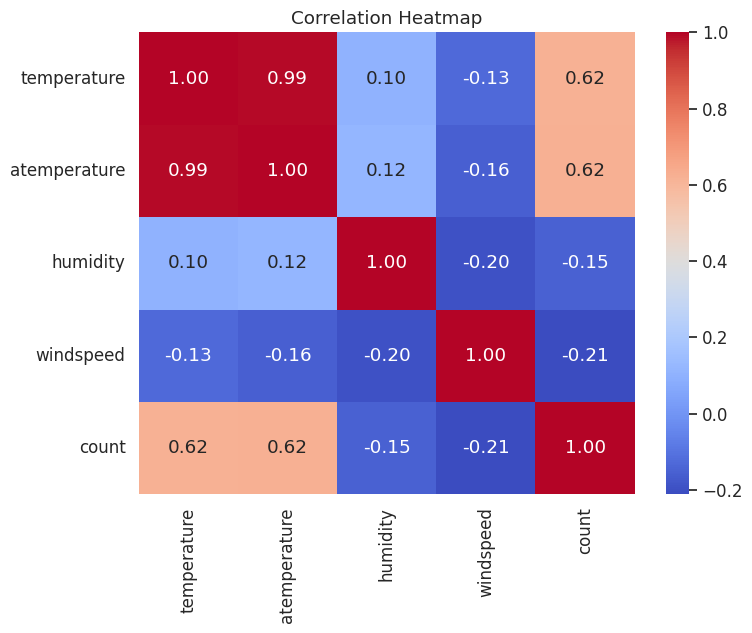

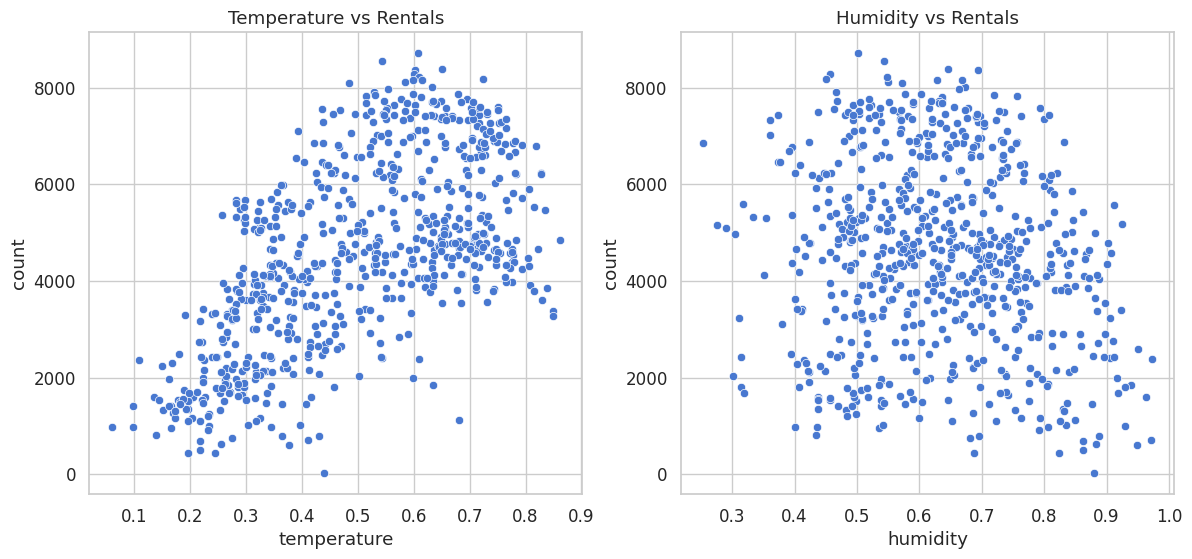

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

sns.set(style="whitegrid", palette="muted", font_scale=1.1)

# 1. Distribution of rentals
plt.figure(figsize=(8,5))
sns.histplot(data['count'], bins=30, kde=True)
plt.title("Distribution of Bike Rentals (count)")
plt.xlabel("Number of Rentals")
plt.ylabel("Frequency")
plt.show()

# 2. Weather effect (using one-hot encoded columns)
weather_cols = ['weather_name_Light Snow/Rain', 'weather_name_Mist + Cloudy']
data['weather'] = 'Clear'
for col in weather_cols:
    data.loc[data[col] == 1, 'weather'] = col.split("_", 2)[-1]

plt.figure(figsize=(8,5))
sns.barplot(x="weather", y="count", data=data, estimator=np.mean)
plt.title("Average Rentals by Weather")
plt.xlabel("Weather Condition")
plt.ylabel("Average Rentals")
plt.show()

# 3. Working day vs holiday
plt.figure(figsize=(8,5))
sns.barplot(x="workingday", y="count", data=data, estimator=np.mean)
plt.title("Average Rentals: Working Day vs Non-working Day")
plt.xlabel("Working Day (0 = No, 1 = Yes)")
plt.ylabel("Average Rentals")
plt.show()

plt.figure(figsize=(8,5))
sns.barplot(x="holiday", y="count", data=data, estimator=np.mean)
plt.title("Average Rentals: Holiday vs Non-holiday")
plt.xlabel("Holiday (0 = No, 1 = Yes)")
plt.ylabel("Average Rentals")
plt.show()

# 4. Seasonal demand (reconstruct from one-hot)
season_cols = ['season_name_spring', 'season_name_summer', 'season_name_winter']
data['season'] = 'Fall'  # default if none of the one-hot columns = 1
for col in season_cols:
    season_name = col.split("_")[-1].capitalize()
    data.loc[data[col] == 1, 'season'] = season_name

plt.figure(figsize=(8,5))
sns.barplot(x="season", y="count", data=data, estimator=np.mean, order=['Spring','Summer','Fall','Winter'])
plt.title("Average Rentals by Season")
plt.xlabel("Season")
plt.ylabel("Average Rentals")
plt.show()

# 5. Day of week pattern
plt.figure(figsize=(8,5))
sns.barplot(x="weekday", y="count", data=data, estimator=np.mean)
plt.title("Average Rentals by Day of Week")
plt.xlabel("Day of Week (0=Sunday)")
plt.ylabel("Average Rentals")
plt.show()

# 6. Monthly trend
plt.figure(figsize=(10,6))
sns.lineplot(x="month", y="count", data=data, estimator=np.mean)
plt.title("Average Rentals by Month")
plt.xlabel("Month")
plt.ylabel("Average Rentals")
plt.show()

# 7. Correlation heatmap
plt.figure(figsize=(8,6))
corr = data[['temperature', 'atemperature', 'humidity', 'windspeed', 'count']].corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# 8. Scatter plots with target
fig, ax = plt.subplots(1, 2, figsize=(14,6))
sns.scatterplot(x="temperature", y="count", data=data, ax=ax[0])
ax[0].set_title("Temperature vs Rentals")

sns.scatterplot(x="humidity", y="count", data=data, ax=ax[1])
ax[1].set_title("Humidity vs Rentals")

plt.show()


In [ ]:
print(data.columns)

Index(['year', 'month', 'holiday', 'weekday', 'workingday', 'temperature',
       'atemperature', 'humidity', 'windspeed', 'count', 'weekday_num',
       'season_name_spring', 'season_name_summer', 'season_name_winter',
       'weather_name_Light Snow/Rain', 'weather_name_Mist + Cloudy',
       'quarter_Q2', 'quarter_Q3', 'quarter_Q4', 'weather', 'season'],
      dtype='object')


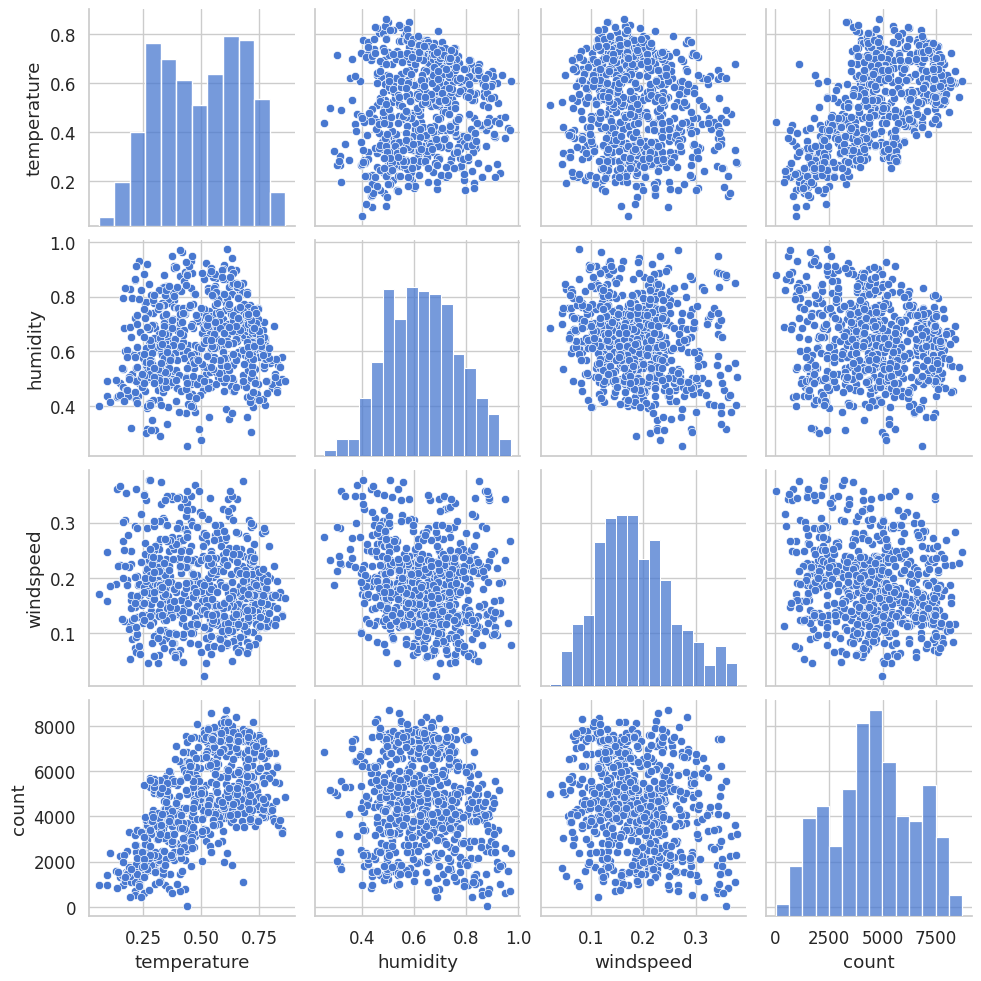

In [ ]:
# Pairplot for selected features
sns.pairplot(data[['temperature', 'humidity', 'windspeed', 'count']])
plt.show()


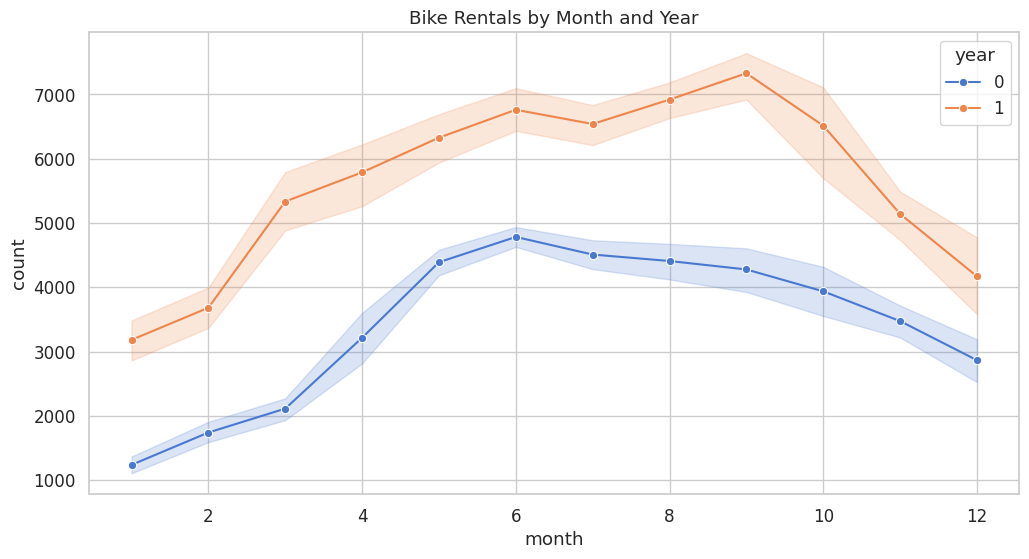

In [ ]:
# Rentals by month and year
plt.figure(figsize=(12, 6))
sns.lineplot(x="month", y="count", hue="year", data=data, marker="o")
plt.title("Bike Rentals by Month and Year")
plt.show()

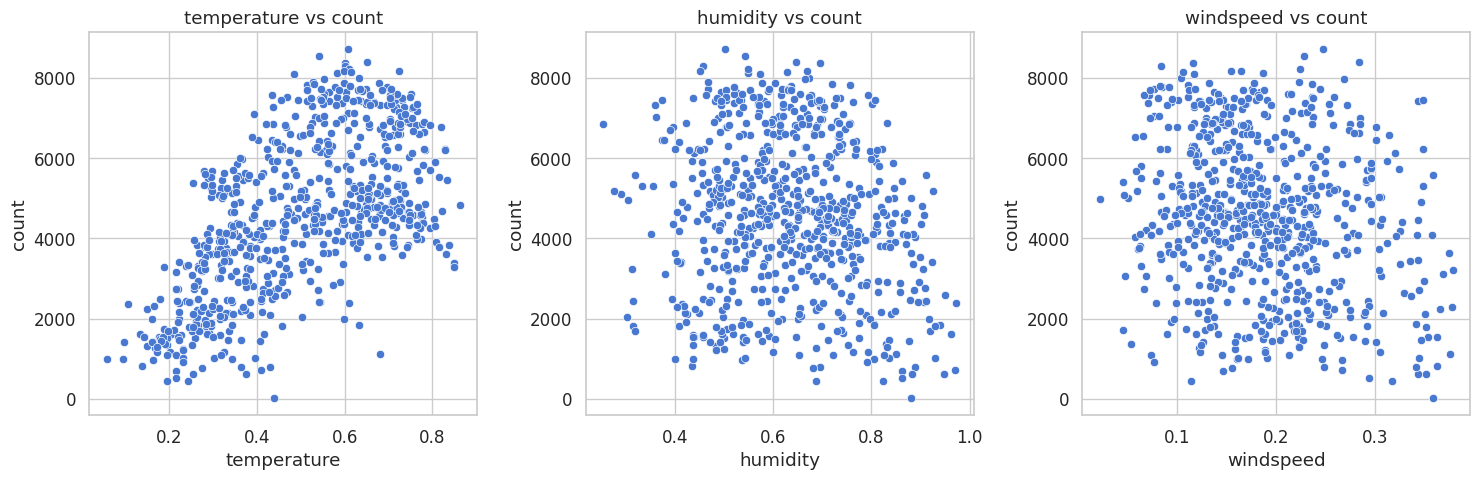

In [ ]:
# Feature vs Target scatterplots
features = ['temperature', 'humidity', 'windspeed']

plt.figure(figsize=(15, 5))
for i, col in enumerate(features, 1):
    plt.subplot(1, 3, i)
    sns.scatterplot(x=data[col], y=data['count'])
    plt.title(f"{col} vs count")
plt.tight_layout()
plt.show()


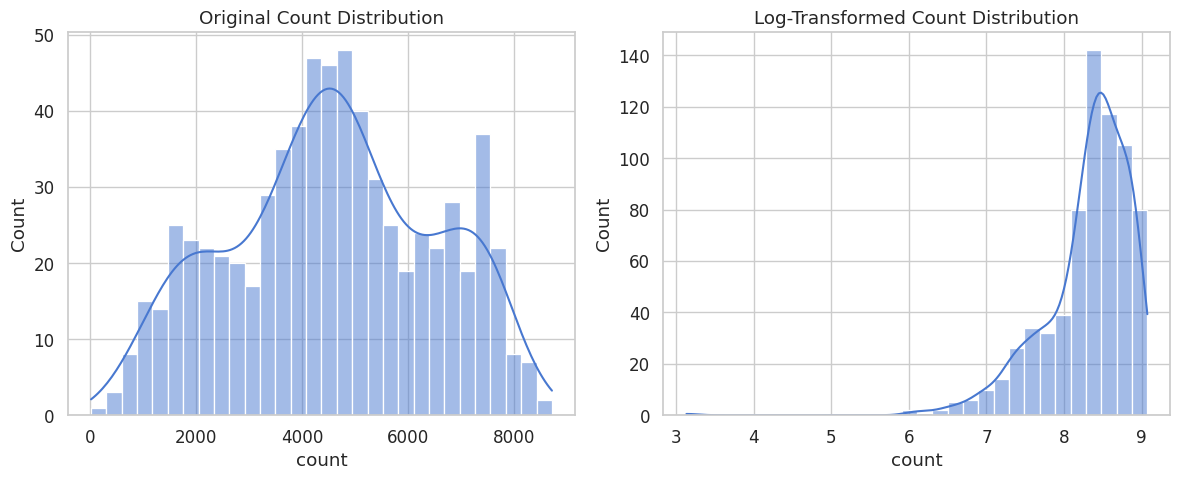

In [ ]:
# Distribution of target before/after log transform
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(data['count'], kde=True, bins=30)
plt.title("Original Count Distribution")

plt.subplot(1, 2, 2)
sns.histplot(np.log1p(data['count']), kde=True, bins=30)
plt.title("Log-Transformed Count Distribution")

plt.tight_layout()
plt.show()


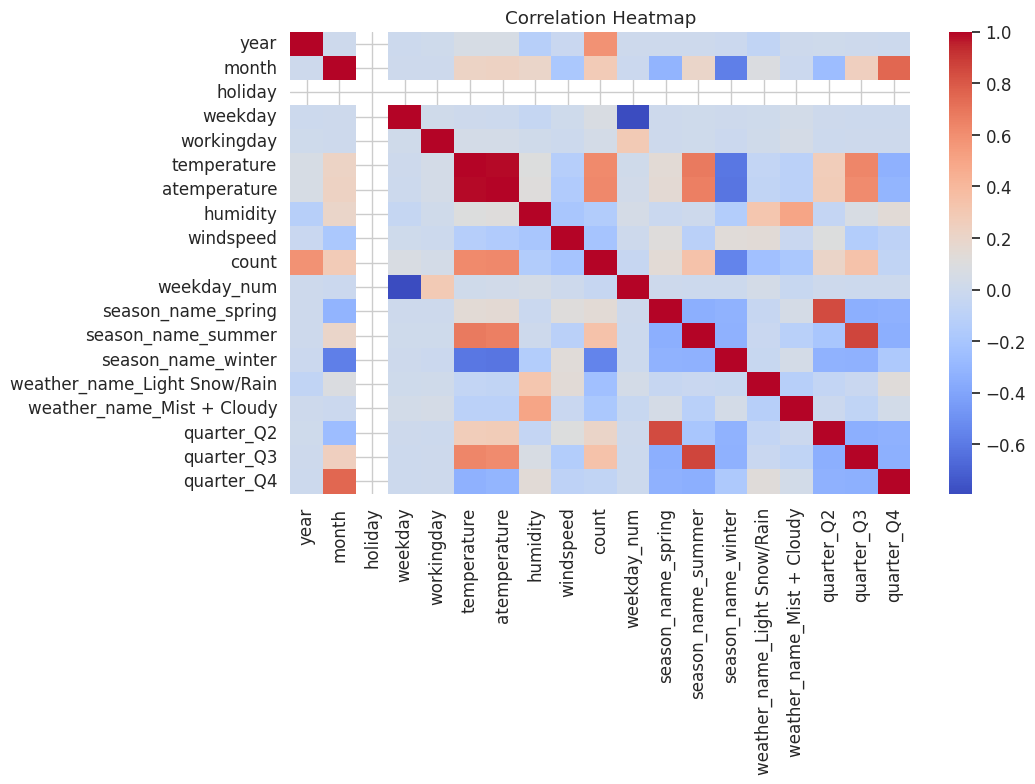

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(data.select_dtypes(include=np.number).corr(), annot=False, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

# **Log Transform Target**

In [ ]:
# Apply log transform to reduce skewness
data['count'] = np.log1p(data['count'])
data

year  month  holiday  weekday  workingday  temperature  atemperature  \
0       0      1        0        6           0     0.344167      0.363625   
1       0      1        0        0           0     0.363478      0.353739   
2       0      1        0        1           1     0.196364      0.189405   
3       0      1        0        2           1     0.200000      0.212122   
4       0      1        0        3           1     0.226957      0.229270   
..    ...    ...      ...      ...         ...          ...           ...   
726     1     12        0        4           1     0.254167      0.226642   
727     1     12        0        5           1     0.253333      0.255046   
728     1     12        0        6           0     0.253333      0.242400   
729     1     12        0        0           0     0.255833      0.231700   
730     1     12        0        1           1     0.215833      0.223487   

     humidity  windspeed     count  ...  season_name_spring  \
0    0.805833   0.160446  6.893656  ...                   0   
1    0.696087   0.248539  6.687109  ...                   0   
2    0.437273   0.248309  7.207860  ...                   0   
3    0.590435   0.160296  7.354362  ...                   0   
4    0.436957   0.186900  7.378384  ...                   0   
..        ...        ...       ...  ...                 ...   
726  0.652917   0.350133  7.656810  ...                   0   
727  0.590000   0.155471  8.037866  ...                   0   
728  0.752917   0.124383  7.201916  ...                   0   
729  0.483333   0.350754  7.493874  ...                   0   
730  0.577500   0.154846  7.912057  ...                   0   

     season_name_summer  season_name_winter  weather_name_Light Snow/Rain  \
0                     0                   1                             0   
1                     0                   1                             0   
2                     0                   1                             0   
3                     0                   1                             0   
4                     0                   1                             0   
..                  ...                 ...                           ...   
726                   0                   1                             0   
727                   0                   1                             0   
728                   0                   1                             0   
729                   0                   1                             0   
730                   0                   1                             0   

     weather_name_Mist + Cloudy  quarter_Q2  quarter_Q3  quarter_Q4  \
0                             1           0           0           0   
1                             1           0           0           0   
2                             0           0           0           0   
3                             0           0           0           0   
4                             0           0           0           0   
..                          ...         ...         ...         ...   
726                           1           0           0           1   
727                           1           0           0           1   
728                           1           0           0           1   
729                           0           0           0           1   
730                           1           0           0           1   

           weather  season  
0    Mist + Cloudy  Winter  
1    Mist + Cloudy  Winter  
2            Clear  Winter  
3            Clear  Winter  
4            Clear  Winter  
..             ...     ...  
726  Mist + Cloudy  Winter  
727  Mist + Cloudy  Winter  
728  Mist + Cloudy  Winter  
729          Clear  Winter  
730  Mist + Cloudy  Winter  

[696 rows x 21 columns]

# **Model Building**

In [ ]:
# Libraries for models, metrics, and visualization
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, mean_absolute_percentage_error


# Split data (replace X, y with your features and target after preprocessing)
X = data.drop(columns=['count', 'weather', 'season'])   # Features
y = data['count']                  # Target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Helper function to evaluate models
def evaluate_model(y_true, y_pred, model_name):
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = mean_absolute_percentage_error(y_true, y_pred)
    print(f"{model_name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"MAPE: {mape:.2f}")
    print(f"R²: {r2:.2f}")
    print("-"*40)
    return rmse, mae, r2, mape

# Helper function to plot predicted vs actual
def plot_predicted_vs_actual(y_true, y_pred, model_name):
    plt.figure(figsize=(6,4))
    plt.scatter(y_true, y_pred, alpha=0.6)
    plt.plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
    plt.title(f"{model_name}: Predicted vs Actual")
    plt.show()

**Linear Regression**

Linear Regression Performance:
RMSE: 0.21
MAE: 0.15
MAPE: 0.02
R²: 0.84
----------------------------------------


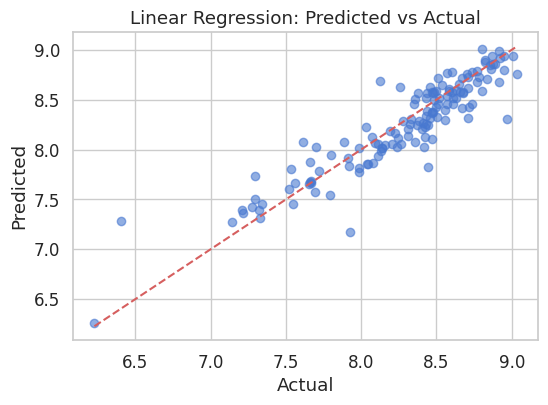

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

# Evaluate
lr_results = evaluate_model(y_test, y_pred_lr, "Linear Regression")

# Plot
plot_predicted_vs_actual(y_test, y_pred_lr, "Linear Regression")


**KNN Regressor**

KNN Regressor Performance:
RMSE: 0.30
MAE: 0.19
MAPE: 0.02
R²: 0.66
----------------------------------------


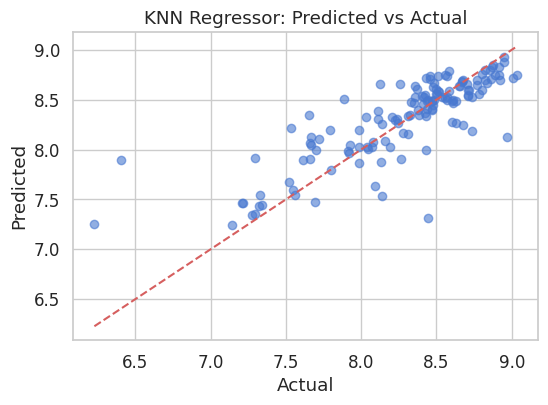

In [ ]:
from sklearn.neighbors import KNeighborsRegressor

knn = KNeighborsRegressor(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)

# Evaluate
knn_results = evaluate_model(y_test, y_pred_knn, "KNN Regressor")

# Plot
plot_predicted_vs_actual(y_test, y_pred_knn, "KNN Regressor")


**SVR**

SVR Performance:
RMSE: 0.18
MAE: 0.11
MAPE: 0.01
R²: 0.87
----------------------------------------


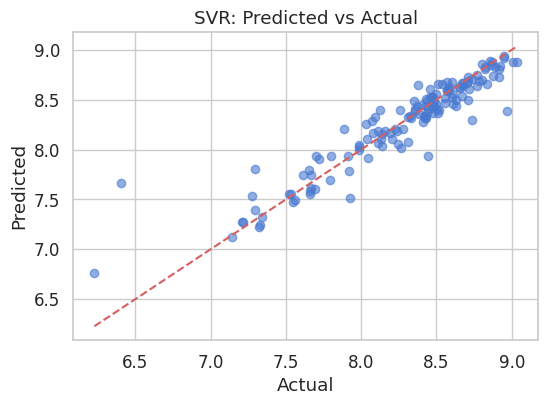

In [ ]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf', C=100, gamma='scale')
svr.fit(X_train, y_train)
y_pred_svr = svr.predict(X_test)

# Evaluate
svr_results = evaluate_model(y_test, y_pred_svr, "SVR")

# Plot
plot_predicted_vs_actual(y_test, y_pred_svr, "SVR")


**Decision Tree**

Decision Tree Performance:
RMSE: 0.30
MAE: 0.19
MAPE: 0.02
R²: 0.66
----------------------------------------


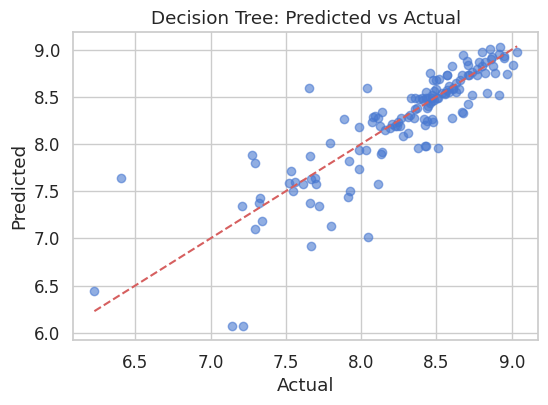

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(random_state=42)
dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

# Evaluate
dt_results = evaluate_model(y_test, y_pred_dt, "Decision Tree")

# Plot
plot_predicted_vs_actual(y_test, y_pred_dt, "Decision Tree")

**Decision Tree (With Parameters)**

Decision Tree (Tuned) Performance:
RMSE: 0.28
MAE: 0.17
MAPE: 0.02
R²: 0.70
----------------------------------------


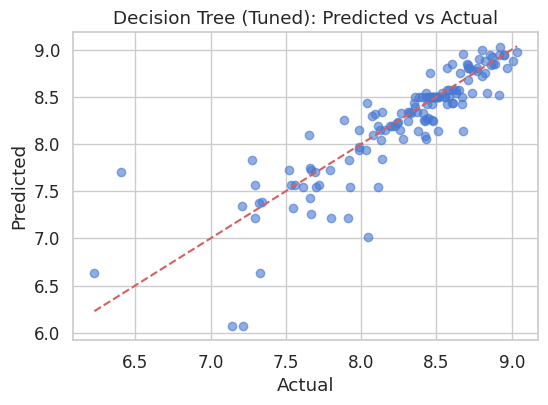

In [ ]:
dt_param = DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42)
dt_param.fit(X_train, y_train)
y_pred_dt_param = dt_param.predict(X_test)

# Evaluate
dt_param_results = evaluate_model(y_test, y_pred_dt_param, "Decision Tree (Tuned)")

# Plot
plot_predicted_vs_actual(y_test, y_pred_dt_param, "Decision Tree (Tuned)")


**Random Forest**

Random Forest Performance:
RMSE: 0.16
MAE: 0.11
MAPE: 0.01
R²: 0.90
----------------------------------------


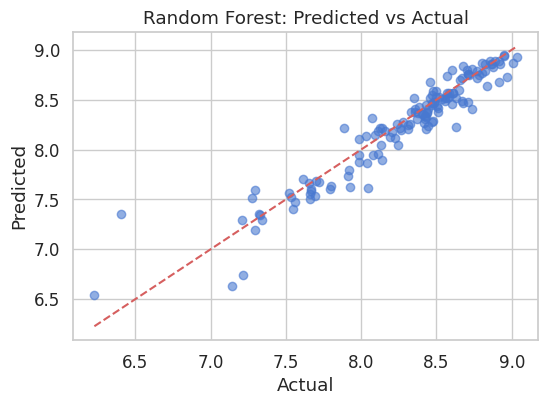

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

# Evaluate
rf_results = evaluate_model(y_test, y_pred_rf, "Random Forest")

# Plot
plot_predicted_vs_actual(y_test, y_pred_rf, "Random Forest")


**Random Forest (With Parameters)**

Random Forest (Tuned) Performance:
RMSE: 0.17
MAE: 0.11
MAPE: 0.01
R²: 0.89
----------------------------------------


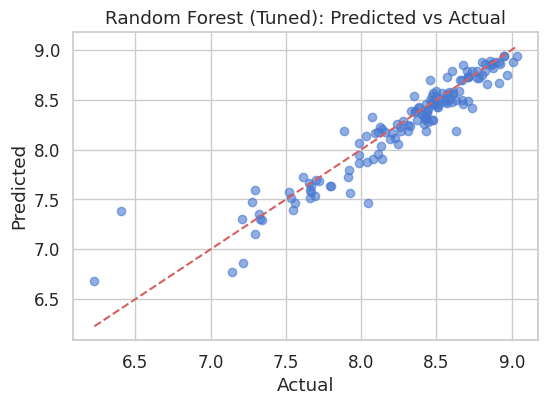

In [ ]:
rf_param = RandomForestRegressor(
    n_estimators=200, max_depth=15, min_samples_split=5, random_state=42
)
rf_param.fit(X_train, y_train)
y_pred_rf_param = rf_param.predict(X_test)

# Evaluate
rf_param_results = evaluate_model(y_test, y_pred_rf_param, "Random Forest (Tuned)")

# Plot
plot_predicted_vs_actual(y_test, y_pred_rf_param, "Random Forest (Tuned)")


**Bagging Regressor**

Bagging Regressor Performance:
RMSE: 0.17
MAE: 0.12
MAPE: 0.01
R²: 0.88
----------------------------------------


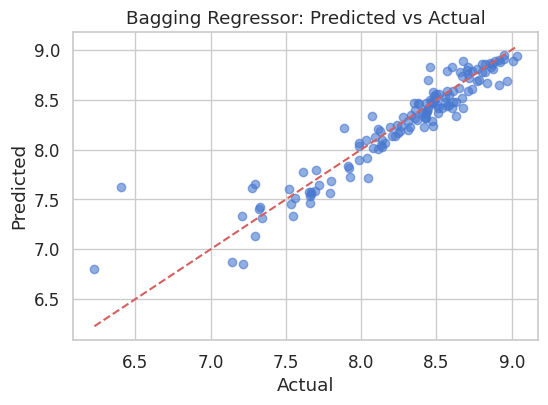

In [ ]:
from sklearn.ensemble import BaggingRegressor

bag = BaggingRegressor(random_state=42)
bag.fit(X_train, y_train)
y_pred_bag = bag.predict(X_test)

# Evaluate
bag_results = evaluate_model(y_test, y_pred_bag, "Bagging Regressor")

# Plot
plot_predicted_vs_actual(y_test, y_pred_bag, "Bagging Regressor")


**Bagging Regressor (With Parameters)**

Bagging Regressor (Tuned) Performance:
RMSE: 0.17
MAE: 0.12
MAPE: 0.01
R²: 0.88
----------------------------------------


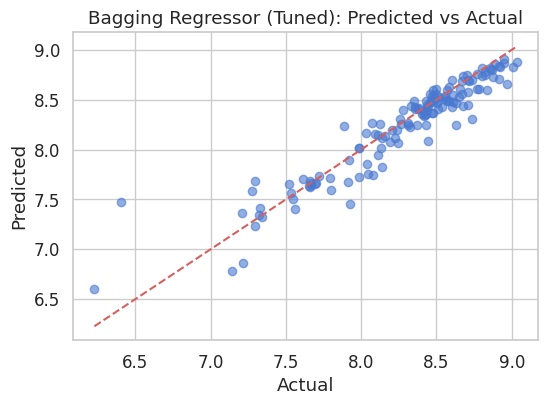

In [ ]:
bag_param = BaggingRegressor(
    n_estimators=100, max_samples=0.8, max_features=0.8, random_state=42
)
bag_param.fit(X_train, y_train)
y_pred_bag_param = bag_param.predict(X_test)

# Evaluate
bag_param_results = evaluate_model(y_test, y_pred_bag_param, "Bagging Regressor (Tuned)")

# Plot
plot_predicted_vs_actual(y_test, y_pred_bag_param, "Bagging Regressor (Tuned)")


**AdaBoost**

AdaBoost Performance:
RMSE: 0.30
MAE: 0.25
MAPE: 0.03
R²: 0.65
----------------------------------------


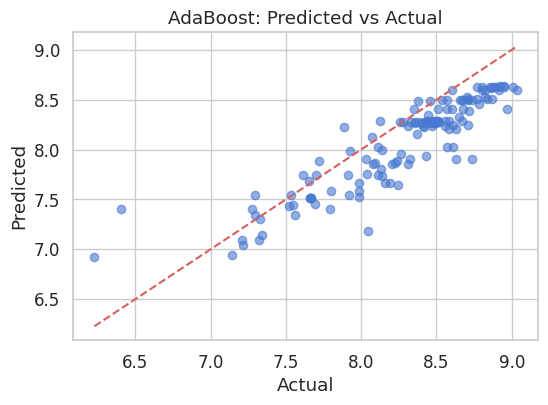

In [ ]:
from sklearn.ensemble import AdaBoostRegressor

ada = AdaBoostRegressor(random_state=42)
ada.fit(X_train, y_train)
y_pred_ada = ada.predict(X_test)

# Evaluate
ada_results = evaluate_model(y_test, y_pred_ada, "AdaBoost")

# Plot
plot_predicted_vs_actual(y_test, y_pred_ada, "AdaBoost")


**AdaBoost (With Parameters)**

AdaBoost (Tuned) Performance:
RMSE: 0.23
MAE: 0.17
MAPE: 0.02
R²: 0.79
----------------------------------------


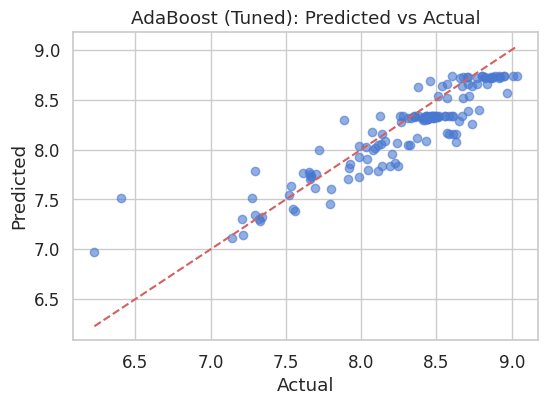

In [ ]:
ada_param = AdaBoostRegressor(
    n_estimators=200, learning_rate=0.05, random_state=42
)
ada_param.fit(X_train, y_train)
y_pred_ada_param = ada_param.predict(X_test)

# Evaluate
ada_param_results = evaluate_model(y_test, y_pred_ada_param, "AdaBoost (Tuned)")

# Plot
plot_predicted_vs_actual(y_test, y_pred_ada_param, "AdaBoost (Tuned)")


**Gradient Boosting**

Gradient Boosting Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.87
----------------------------------------


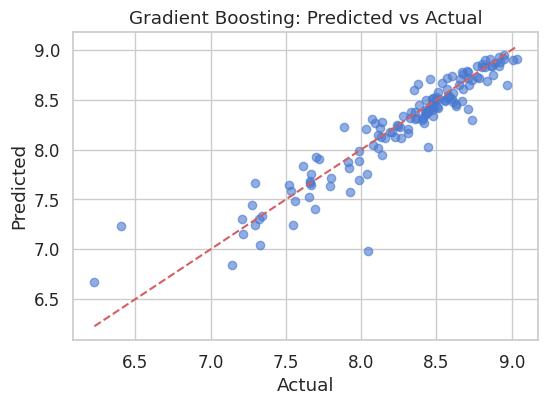

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gb = GradientBoostingRegressor(random_state=42)
gb.fit(X_train, y_train)
y_pred_gb = gb.predict(X_test)

# Evaluate
gb_results = evaluate_model(y_test, y_pred_gb, "Gradient Boosting")

# Plot
plot_predicted_vs_actual(y_test, y_pred_gb, "Gradient Boosting")


**Gradient Boosting (With Parameters)**

Gradient Boosting (Tuned) Performance:
RMSE: 0.19
MAE: 0.11
MAPE: 0.01
R²: 0.86
----------------------------------------


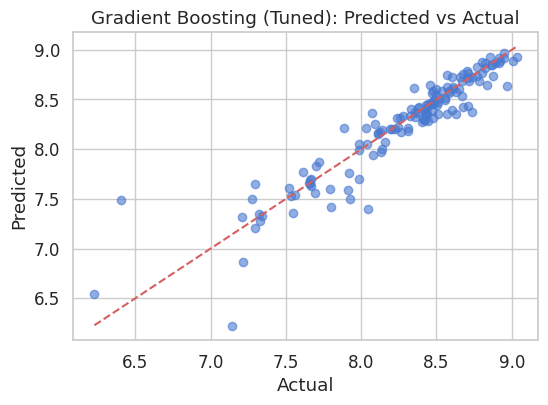

In [ ]:
gb_param = GradientBoostingRegressor(
    n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42
)
gb_param.fit(X_train, y_train)
y_pred_gb_param = gb_param.predict(X_test)

# Evaluate
gb_param_results = evaluate_model(y_test, y_pred_gb_param, "Gradient Boosting (Tuned)")

# Plot
plot_predicted_vs_actual(y_test, y_pred_gb_param, "Gradient Boosting (Tuned)")


**XGBoost**

XGBoost Performance:
RMSE: 0.20
MAE: 0.12
MAPE: 0.02
R²: 0.85
----------------------------------------


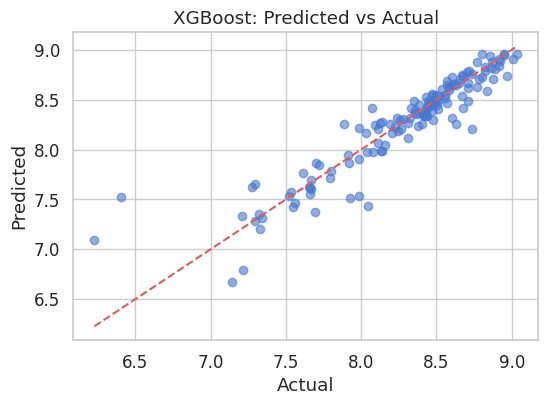

In [ ]:
from xgboost import XGBRegressor

xgb = XGBRegressor(random_state=42, objective="reg:squarederror")
xgb.fit(X_train, y_train)
y_pred_xgb = xgb.predict(X_test)

# Evaluate
xgb_results = evaluate_model(y_test, y_pred_xgb, "XGBoost")

# Plot
plot_predicted_vs_actual(y_test, y_pred_xgb, "XGBoost")


**XGBoost (With Parameters)**

XGBoost (Tuned) Performance:
RMSE: 0.18
MAE: 0.11
MAPE: 0.01
R²: 0.88
----------------------------------------


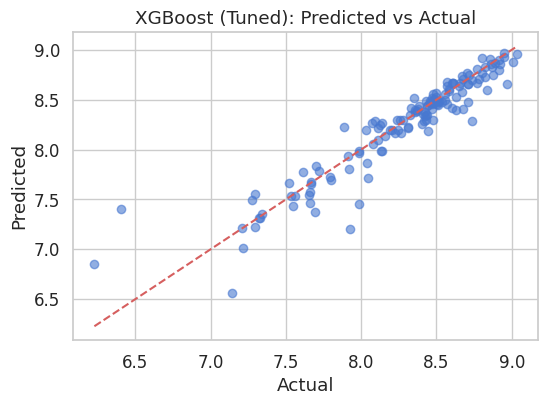

In [ ]:
xgb_param = XGBRegressor(
    n_estimators=500, learning_rate=0.05, max_depth=6, subsample=0.8,
    colsample_bytree=0.8, random_state=42, objective="reg:squarederror"
)
xgb_param.fit(X_train, y_train)
y_pred_xgb_param = xgb_param.predict(X_test)

# Evaluate
xgb_param_results = evaluate_model(y_test, y_pred_xgb_param, "XGBoost (Tuned)")

# Plot
plot_predicted_vs_actual(y_test, y_pred_xgb_param, "XGBoost (Tuned)")


***Comparison Table***

In [ ]:
# Collect results
results = pd.DataFrame({
    "Model": [
        "Linear Regression", "KNN", "SVR",
        "Decision Tree", "Decision Tree (Tuned)",
        "Random Forest", "Random Forest (Tuned)",
        "Bagging", "Bagging (Tuned)",
        "AdaBoost", "AdaBoost (Tuned)",
        "Gradient Boosting", "Gradient Boosting (Tuned)",
        "XGBoost", "XGBoost (Tuned)"
    ],
    "RMSE": [
        lr_results[0], knn_results[0], svr_results[0],
        dt_results[0], dt_param_results[0],
        rf_results[0], rf_param_results[0],
        bag_results[0], bag_param_results[0],
        ada_results[0], ada_param_results[0],
        gb_results[0], gb_param_results[0],
        xgb_results[0], xgb_param_results[0]
    ],
    "MAE": [
        lr_results[1], knn_results[1], svr_results[1],
        dt_results[1], dt_param_results[1],
        rf_results[1], rf_param_results[1],
        bag_results[1], bag_param_results[1],
        ada_results[1], ada_param_results[1],
        gb_results[1], gb_param_results[1],
        xgb_results[1], xgb_param_results[1]
    ],
    "R2": [
        lr_results[2], knn_results[2], svr_results[2],
        dt_results[2], dt_param_results[2],
        rf_results[2], rf_param_results[2],
        bag_results[2], bag_param_results[2],
        ada_results[2], ada_param_results[2],
        gb_results[2], gb_param_results[2],
        xgb_results[2], xgb_param_results[2]
    ],
    "MAPE": [
        lr_results[3], knn_results[3], svr_results[3],
        dt_results[3], dt_param_results[3],
        rf_results[3], rf_param_results[3],
        bag_results[3], bag_param_results[3],
        ada_results[3], ada_param_results[3],
        gb_results[3], gb_param_results[3],
        xgb_results[3], xgb_param_results[3]
    ]
})

results


Model      RMSE       MAE        R2      MAPE
0           Linear Regression  0.206611  0.148530  0.835874  0.018240
1                         KNN  0.295931  0.193621  0.663293  0.024264
2                         SVR  0.182810  0.111451  0.871510  0.013979
3               Decision Tree  0.295769  0.185412  0.663662  0.023352
4       Decision Tree (Tuned)  0.277726  0.167157  0.703445  0.021154
5               Random Forest  0.163768  0.110903  0.896883  0.013888
6       Random Forest (Tuned)  0.166352  0.111783  0.893603  0.014009
7                     Bagging  0.174911  0.115158  0.882373  0.014536
8             Bagging (Tuned)  0.174656  0.115437  0.882716  0.014407
9                    AdaBoost  0.303576  0.251496  0.645672  0.030520
10           AdaBoost (Tuned)  0.231859  0.174980  0.793309  0.021442
11          Gradient Boosting  0.183259  0.117286  0.870877  0.014667
12  Gradient Boosting (Tuned)  0.189468  0.114954  0.861980  0.014493
13                    XGBoost  0.195769  0.118295  0.852647  0.015011
14            XGBoost (Tuned)  0.178496  0.107588  0.877502  0.013575

**Performance Visualization**

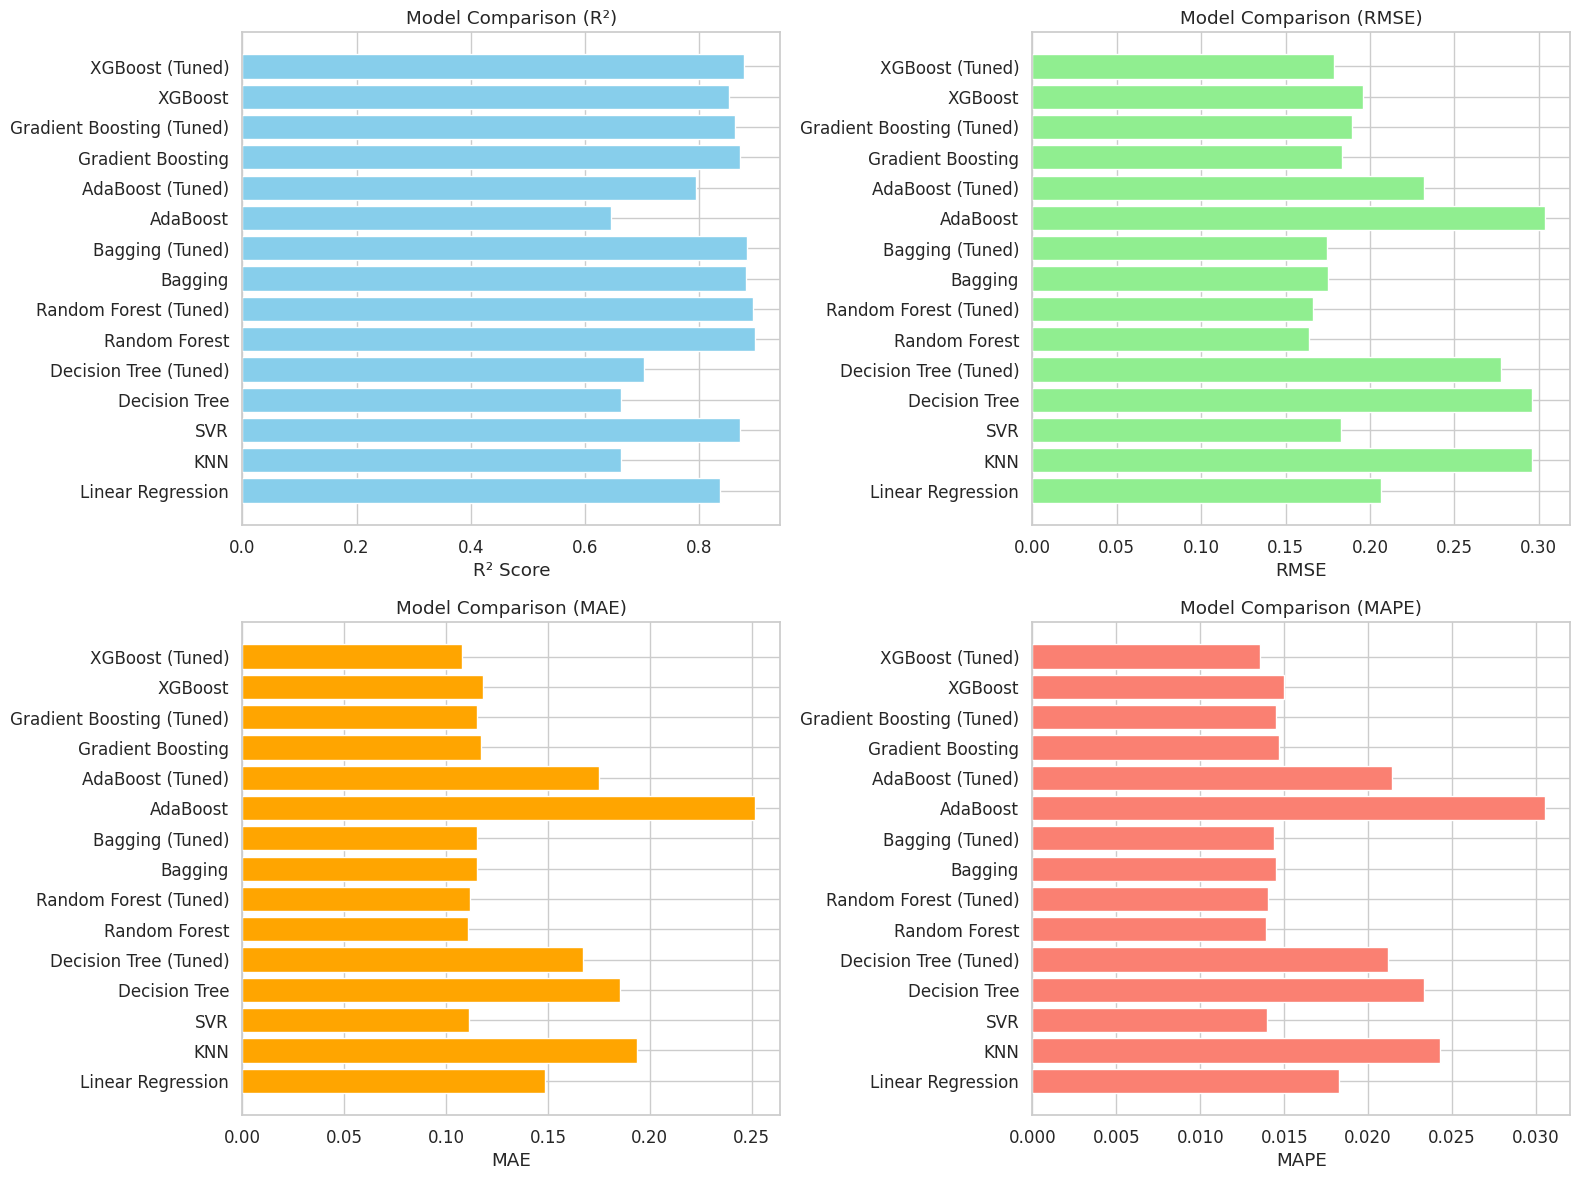

In [ ]:
# Bar plots for all metrics
fig, axes = plt.subplots(2, 2, figsize=(16,12))

# R2 Scores
axes[0,0].barh(results["Model"], results["R2"], color="skyblue")
axes[0,0].set_title("Model Comparison (R²)")
axes[0,0].set_xlabel("R² Score")

# RMSE
axes[0,1].barh(results["Model"], results["RMSE"], color="lightgreen")
axes[0,1].set_title("Model Comparison (RMSE)")
axes[0,1].set_xlabel("RMSE")

# MAE
axes[1,0].barh(results["Model"], results["MAE"], color="orange")
axes[1,0].set_title("Model Comparison (MAE)")
axes[1,0].set_xlabel("MAE")

# MAPE
axes[1,1].barh(results["Model"], results["MAPE"], color="salmon")
axes[1,1].set_title("Model Comparison (MAPE)")
axes[1,1].set_xlabel("MAPE")

plt.tight_layout()
plt.show()


In [ ]:
def highlight_best(s):
    if s.name in ["RMSE", "MAE", "MAPE"]:
        # lower is better
        is_best = s == s.min()
    elif s.name == "R2":
        # higher is better
        is_best = s == s.max()
    else:
        is_best = [False] * len(s)
    return ['background-color: #ADD8E6; font-weight: bold; color: black' if v else '' for v in is_best]

styled_results = results.style.apply(highlight_best, axis=0).set_caption("Model Performance Comparison")
styled_results

# **VIF (Variance Inflation Factor)**

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Copy of original features
X_cleaned = X.copy()

def calculate_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Feature"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

# Iteratively remove features with VIF > 10
threshold = 10
while True:
    vif_df = calculate_vif(X_cleaned)
    max_vif = vif_df["VIF"].max()
    if max_vif > threshold:
        drop_feature = vif_df.sort_values("VIF", ascending=False)["Feature"].iloc[0]
        print(f"Dropping '{drop_feature}' with VIF = {max_vif:.2f}")
        X_cleaned = X_cleaned.drop(columns=[drop_feature])
    else:
        break

print("\nFinal VIF values after cleaning:\n", calculate_vif(X_cleaned))
print("\nRemaining features:", X_cleaned.columns.tolist())

# Train-test split with cleaned data
X_train_vif, X_test_vif, y_train_vif, y_test_vif = train_test_split(
    X_cleaned, y, test_size=0.2, random_state=42
)


Dropping 'atemperature' with VIF = 612.64
Dropping 'month' with VIF = 79.91
Dropping 'humidity' with VIF = 32.34
Dropping 'temperature' with VIF = 25.15

Final VIF values after cleaning:
                          Feature       VIF
0                           year  1.970885
1                        holiday       NaN
2                        weekday  7.511002
3                     workingday  4.485672
4                      windspeed  7.576558
5                    weekday_num  8.617817
6             season_name_spring  8.642831
7             season_name_summer  8.491695
8             season_name_winter  4.297359
9   weather_name_Light Snow/Rain  1.097014
10    weather_name_Mist + Cloudy  1.569534
11                    quarter_Q2  6.884046
12                    quarter_Q3  8.586130
13                    quarter_Q4  4.187726

Remaining features: ['year', 'holiday', 'weekday', 'workingday', 'windspeed', 'weekday_num', 'season_name_spring', 'season_name_summer', 'season_name_winter', 'weathe

**Linear Regression (After VIF)**

In [ ]:
from sklearn.linear_model import LinearRegression

lr_vif = LinearRegression()
lr_vif.fit(X_train_vif, y_train_vif)
y_pred_lr_vif = lr_vif.predict(X_test_vif)

lr_results_vif = evaluate_model(y_test_vif, y_pred_lr_vif, "Linear Regression (After VIF)")


Linear Regression (After VIF) Performance:
RMSE: 0.25
MAE: 0.18
MAPE: 0.02
R²: 0.76
----------------------------------------


**Decision Tree (After VIF)**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

dt_vif = DecisionTreeRegressor(random_state=42)
dt_vif.fit(X_train_vif, y_train_vif)
y_pred_dt_vif = dt_vif.predict(X_test_vif)

dt_results_vif = evaluate_model(y_test_vif, y_pred_dt_vif, "Decision Tree (After VIF)")


Decision Tree (After VIF) Performance:
RMSE: 0.34
MAE: 0.23
MAPE: 0.03
R²: 0.57
----------------------------------------


**Random Forest (After VIF)**

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_vif = RandomForestRegressor(random_state=42)
rf_vif.fit(X_train_vif, y_train_vif)
y_pred_rf_vif = rf_vif.predict(X_test_vif)

rf_results_vif = evaluate_model(y_test_vif, y_pred_rf_vif, "Random Forest (After VIF)")


Random Forest (After VIF) Performance:
RMSE: 0.27
MAE: 0.19
MAPE: 0.02
R²: 0.72
----------------------------------------


**XGBoost (After VIF)**

In [ ]:
from xgboost import XGBRegressor

xgb_vif = XGBRegressor(random_state=42, verbosity=0)
xgb_vif.fit(X_train_vif, y_train_vif)
y_pred_xgb_vif = xgb_vif.predict(X_test_vif)

xgb_results_vif = evaluate_model(y_test_vif, y_pred_xgb_vif, "XGBoost (After VIF)")


XGBoost (After VIF) Performance:
RMSE: 0.28
MAE: 0.20
MAPE: 0.03
R²: 0.70
----------------------------------------


In [ ]:
# Ensure all values are float
comparison_df = pd.DataFrame({
    "Model": ["Linear Regression", "Decision Tree", "Random Forest", "XGBoost"],

    "RMSE (Before VIF)": [float(lr_results[0]), float(dt_results[0]), float(rf_results[0]), float(xgb_results[0])],
    "MAE (Before VIF)":  [float(lr_results[1]), float(dt_results[1]), float(rf_results[1]), float(xgb_results[1])],
    "MAPE (Before VIF)": [float(lr_results[3]), float(dt_results[3]), float(rf_results[3]), float(xgb_results[3])],
    "R² (Before VIF)":   [float(lr_results[2]), float(dt_results[2]), float(rf_results[2]), float(xgb_results[2])],

    "RMSE (After VIF)": [float(lr_results_vif[0]), float(dt_results_vif[0]), float(rf_results_vif[0]), float(xgb_results_vif[0])],
    "MAE (After VIF)":  [float(lr_results_vif[1]), float(dt_results_vif[1]), float(rf_results_vif[1]), float(xgb_results_vif[1])],
    "MAPE (After VIF)": [float(lr_results_vif[3]), float(dt_results_vif[3]), float(rf_results_vif[3]), float(xgb_results_vif[3])],
    "R² (After VIF)":   [float(lr_results_vif[2]), float(dt_results_vif[2]), float(rf_results_vif[2]), float(xgb_results_vif[2])],
})

# Highlight best performers
def highlight_best(df):
    styles = pd.DataFrame("", index=df.index, columns=df.columns)
    # For RMSE, MAE, MAPE → lower is better
    for col in ["RMSE (Before VIF)", "RMSE (After VIF)",
                "MAE (Before VIF)", "MAE (After VIF)",
                "MAPE (Before VIF)", "MAPE (After VIF)"]:
        best_idx = df[col].idxmin()
        styles.loc[best_idx, col] = "background-color: lightblue; color: black; font-weight: bold;"
    # For R² → higher is better
    for col in ["R² (Before VIF)", "R² (After VIF)"]:
        best_idx = df[col].idxmax()
        styles.loc[best_idx, col] = "background-color: lightblue; color: black; font-weight: bold;"
    return styles

# Apply formatting only to numerical columns
styled_comparison_df = comparison_df.style.format(
    {col: "{:.3f}" for col in comparison_df.columns if col != "Model"}
).apply(highlight_best, axis=None)

styled_comparison_df


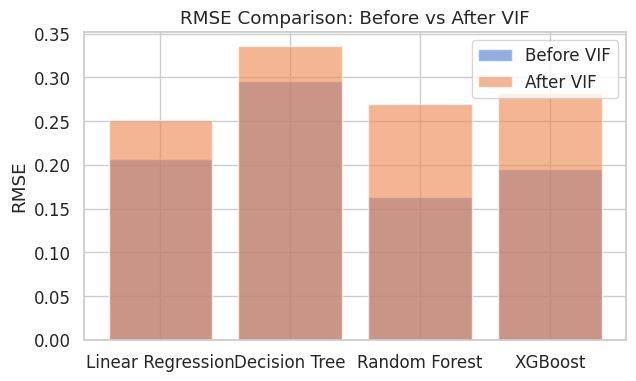

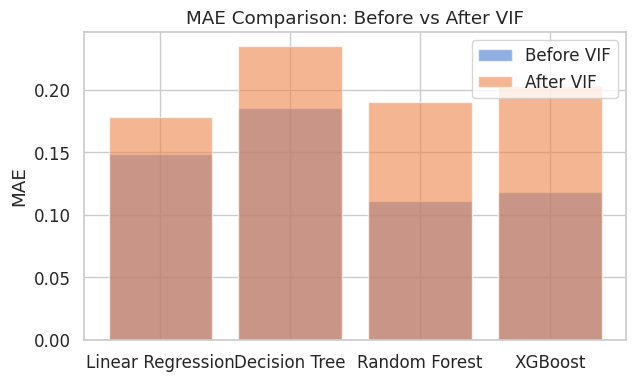

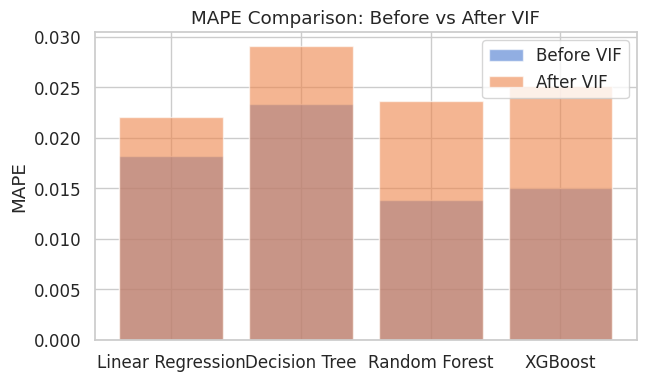

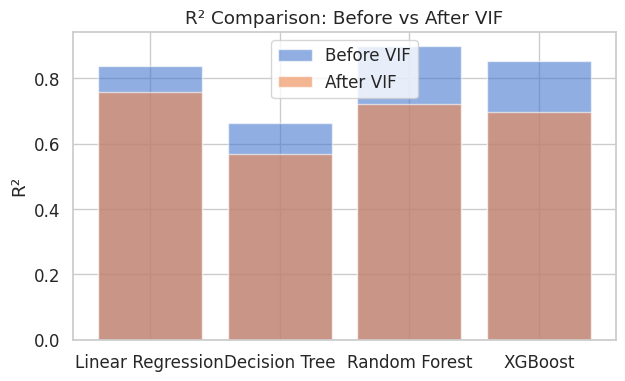

In [ ]:
metrics = ["RMSE", "MAE", "MAPE", "R²"]

for metric in metrics:
    plt.figure(figsize=(7,4))
    plt.bar(comparison_df["Model"], comparison_df[f"{metric} (Before VIF)"],
            alpha=0.6, label="Before VIF")
    plt.bar(comparison_df["Model"], comparison_df[f"{metric} (After VIF)"],
            alpha=0.6, label="After VIF")
    plt.ylabel(metric)
    plt.title(f"{metric} Comparison: Before vs After VIF")
    plt.legend()
    plt.show()


# **ANN-Artificial Neural Network**

In [ ]:
from sklearn.preprocessing import StandardScaler
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.callbacks import EarlyStopping

# Scale features
X_scaler = StandardScaler()
X_train_scaled = X_scaler.fit_transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

# Scale target
y_scaler = StandardScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
ANN Model 1 Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.87
----------------------------------------


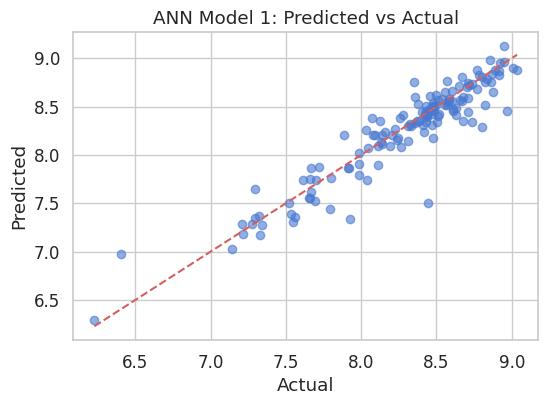

In [ ]:
# Simple ANN (Model 1)
model1 = keras.Sequential([
    layers.Dense(32, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(1)
])

model1.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train (
history1 = model1.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=50, batch_size=32, verbose=0
)

# Predictions (inverse transform back to original scale)
y_pred_scaled = model1.predict(X_test_scaled)
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Evaluate
evaluate_model(y_test, y_pred.flatten(), "ANN Model 1")
plot_predicted_vs_actual(y_test, y_pred.flatten(), "ANN Model 1")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step
ANN Model 2 Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.88
----------------------------------------


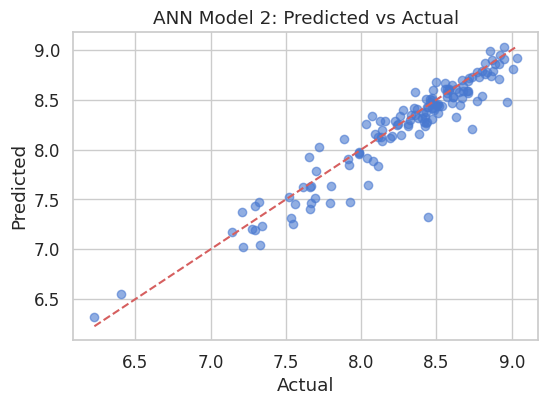

In [ ]:
# ANN Model 2
model2 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model2.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history2 = model2.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=50, batch_size=32, verbose=0
)

# Predictions (inverse transform)
y_pred2_scaled = model2.predict(X_test_scaled)
y_pred2 = y_scaler.inverse_transform(y_pred2_scaled)

# Evaluate
evaluate_model(y_test, y_pred2.flatten(), "ANN Model 2")
plot_predicted_vs_actual(y_test, y_pred2.flatten(), "ANN Model 2")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
ANN Model 3 Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.88
----------------------------------------


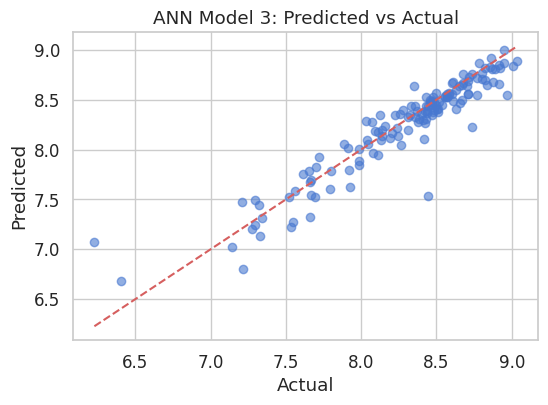

In [ ]:
# ANN Model 3
model3 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.2),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model3.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history3 = model3.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=50, batch_size=32, verbose=0
)

# Predictions (inverse transform)
y_pred3_scaled = model3.predict(X_test_scaled)
y_pred3 = y_scaler.inverse_transform(y_pred3_scaled)

# Evaluate
evaluate_model(y_test, y_pred3.flatten(), "ANN Model 3")
plot_predicted_vs_actual(y_test, y_pred3.flatten(), "ANN Model 3")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
ANN Model 4 Performance:
RMSE: 0.19
MAE: 0.13
MAPE: 0.02
R²: 0.85
----------------------------------------


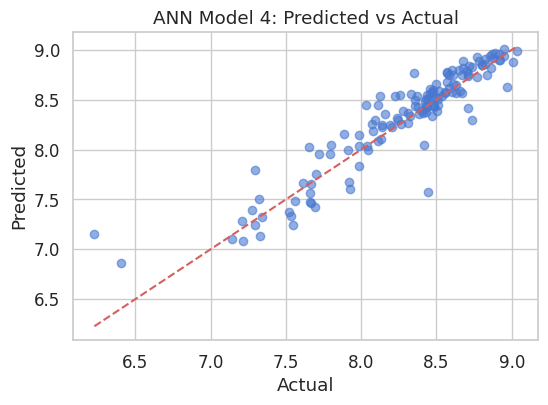

In [ ]:
# ANN Model 4
model4 = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.BatchNormalization(),
    layers.Dropout(0.3),

    layers.Dense(64, activation='relu'),
    layers.BatchNormalization(),
    layers.Dropout(0.2),

    layers.Dense(32, activation='relu'),
    layers.Dense(1)
])

model4.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history4 = model4.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=50, batch_size=32, verbose=0
)

# Predictions (inverse transform)
y_pred4_scaled = model4.predict(X_test_scaled)
y_pred4 = y_scaler.inverse_transform(y_pred4_scaled)

# Evaluate
evaluate_model(y_test, y_pred4.flatten(), "ANN Model 4")
plot_predicted_vs_actual(y_test, y_pred4.flatten(), "ANN Model 4")


5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
ANN Model 5 Performance:
RMSE: 0.15
MAE: 0.10
MAPE: 0.01
R²: 0.91
----------------------------------------


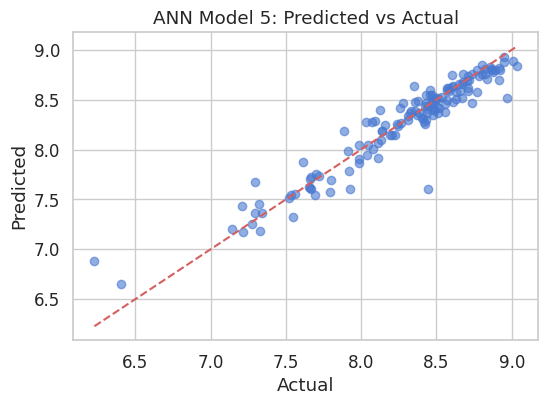

In [ ]:
# ANN Model 5
model5 = keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(X_train_scaled.shape[1],)),
    layers.Dropout(0.1),

    layers.Dense(32, activation='relu'),
    layers.Dropout(0.1),

    layers.Dense(16, activation='relu'),
    layers.Dense(1)
])

model5.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train
history5 = model5.fit(
    X_train_scaled, y_train_scaled,
    validation_data=(X_test_scaled, y_test_scaled),
    epochs=50, batch_size=32, verbose=0
)

# Predictions (inverse transform)
y_pred5_scaled = model5.predict(X_test_scaled)
y_pred5 = y_scaler.inverse_transform(y_pred5_scaled)

# Evaluate
evaluate_model(y_test, y_pred5.flatten(), "ANN Model 5")
plot_predicted_vs_actual(y_test, y_pred5.flatten(), "ANN Model 5")


In [ ]:
# Collect ANN model results
ann_results = pd.DataFrame({
    "Model": [
        "ANN Model 1", "ANN Model 2", "ANN Model 3", "ANN Model 4", "ANN Model 5"
    ],
    "RMSE": [
        evaluate_model(y_test, y_pred.flatten(), "ANN Model 1")[0],
        evaluate_model(y_test, y_pred2.flatten(), "ANN Model 2")[0],
        evaluate_model(y_test, y_pred3.flatten(), "ANN Model 3")[0],
        evaluate_model(y_test, y_pred4.flatten(), "ANN Model 4")[0],
        evaluate_model(y_test, y_pred5.flatten(), "ANN Model 5")[0]
    ],
    "MAE": [
        evaluate_model(y_test, y_pred.flatten(), "ANN Model 1")[1],
        evaluate_model(y_test, y_pred2.flatten(), "ANN Model 2")[1],
        evaluate_model(y_test, y_pred3.flatten(), "ANN Model 3")[1],
        evaluate_model(y_test, y_pred4.flatten(), "ANN Model 4")[1],
        evaluate_model(y_test, y_pred5.flatten(), "ANN Model 5")[1]
    ],
    "R2": [
        evaluate_model(y_test, y_pred.flatten(), "ANN Model 1")[2],
        evaluate_model(y_test, y_pred2.flatten(), "ANN Model 2")[2],
        evaluate_model(y_test, y_pred3.flatten(), "ANN Model 3")[2],
        evaluate_model(y_test, y_pred4.flatten(), "ANN Model 4")[2],
        evaluate_model(y_test, y_pred5.flatten(), "ANN Model 5")[2]
    ],
     "MAPE": [
        evaluate_model(y_test, y_pred.flatten(), "ANN Model 1")[3],
        evaluate_model(y_test, y_pred2.flatten(), "ANN Model 2")[3],
        evaluate_model(y_test, y_pred3.flatten(), "ANN Model 3")[3],
        evaluate_model(y_test, y_pred4.flatten(), "ANN Model 4")[3],
        evaluate_model(y_test, y_pred5.flatten(), "ANN Model 5")[3]
    ]
})

# Highlight best performers
def highlight_best(s):
    if s.name in ["RMSE", "MAE", "MAPE"]:
        # lower is better
        is_best = s == s.min()
    elif s.name == "R2":
        # higher is better
        is_best = s == s.max()
    else:
        is_best = [False] * len(s)
    return ['background-color: #ADD8E6; font-weight: bold; color: black' if v else '' for v in is_best]

styled_ann_results = ann_results.style.apply(highlight_best, axis=0).set_caption("ANN Model Performance Comparison")
styled_ann_results

ANN Model 1 Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.87
----------------------------------------
ANN Model 2 Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.88
----------------------------------------
ANN Model 3 Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.88
----------------------------------------
ANN Model 4 Performance:
RMSE: 0.19
MAE: 0.13
MAPE: 0.02
R²: 0.85
----------------------------------------
ANN Model 5 Performance:
RMSE: 0.15
MAE: 0.10
MAPE: 0.01
R²: 0.91
----------------------------------------
ANN Model 1 Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.87
----------------------------------------
ANN Model 2 Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.88
----------------------------------------
ANN Model 3 Performance:
RMSE: 0.18
MAE: 0.12
MAPE: 0.01
R²: 0.88
----------------------------------------
ANN Model 4 Performance:
RMSE: 0.19
MAE: 0.13
MAPE: 0.02
R²: 0.85
----------------------------------------
ANN Model 5 Performance:
RMSE: 0.15
M

# **Train-60:Test-40**

In [ ]:
# Train-test split (60/40)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.4, random_state=42
)

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    })
    return results

results = []

# Linear Regression
results = evaluate_model("Linear Regression", LinearRegression(), X_train, X_test, y_train, y_test, results)

# KNN
results = evaluate_model("KNN", KNeighborsRegressor(), X_train, X_test, y_train, y_test, results)

# SVR
results = evaluate_model("SVR", SVR(), X_train, X_test, y_train, y_test, results)

# Decision Tree
results = evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Decision Tree (Tuned)", DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42), X_train, X_test, y_train, y_test, results)

# Random Forest
results = evaluate_model("Random Forest", RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Random Forest (Tuned)", RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42), X_train, X_test, y_train, y_test, results)

# Bagging
results = evaluate_model("Bagging", BaggingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Bagging (Tuned)", BaggingRegressor(n_estimators=200, random_state=42), X_train, X_test, y_train, y_test, results)

# AdaBoost
results = evaluate_model("AdaBoost", AdaBoostRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("AdaBoost (Tuned)", AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=42), X_train, X_test, y_train, y_test, results)

# Gradient Boosting
results = evaluate_model("Gradient Boosting", GradientBoostingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Gradient Boosting (Tuned)", GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42), X_train, X_test, y_train, y_test, results)

# XGBoost
results = evaluate_model("XGBoost", XGBRegressor(random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)
results = evaluate_model("XGBoost (Tuned)", XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)

# Convert to DataFrame
results_df40 = pd.DataFrame(results)
print(results_df40)

# If you want sorted by R² (best first)
results_df40 = results_df40.sort_values(by="R2", ascending=False).reset_index(drop=True)
results_df40

                        Model      RMSE       MAE        R2      MAPE
0           Linear Regression  0.221554  0.159938  0.828794  0.019928
1                         KNN  0.337155  0.221107  0.603522  0.027915
2                         SVR  0.257589  0.162598  0.768572  0.020785
3               Decision Tree  0.299504  0.196737  0.687128  0.024773
4       Decision Tree (Tuned)  0.462755  0.206752  0.253100  0.026366
5               Random Forest  0.198673  0.125090  0.862330  0.015862
6       Random Forest (Tuned)  0.195813  0.123906  0.866266  0.015691
7                     Bagging  0.241293  0.144355  0.796929  0.018178
8             Bagging (Tuned)  0.194030  0.123370  0.868689  0.015640
9                    AdaBoost  0.274331  0.217803  0.737512  0.026530
10           AdaBoost (Tuned)  0.241434  0.185103  0.796691  0.022928
11          Gradient Boosting  0.217495  0.133676  0.835010  0.016962
12  Gradient Boosting (Tuned)  0.210523  0.124772  0.845417  0.015785
13                  

Model      RMSE       MAE        R2      MAPE
0             Bagging (Tuned)  0.194030  0.123370  0.868689  0.015640
1       Random Forest (Tuned)  0.195813  0.123906  0.866266  0.015691
2               Random Forest  0.198673  0.125090  0.862330  0.015862
3   Gradient Boosting (Tuned)  0.210523  0.124772  0.845417  0.015785
4             XGBoost (Tuned)  0.213679  0.129712  0.840748  0.016599
5           Gradient Boosting  0.217495  0.133676  0.835010  0.016962
6           Linear Regression  0.221554  0.159938  0.828794  0.019928
7                     XGBoost  0.221781  0.141486  0.828443  0.018081
8                     Bagging  0.241293  0.144355  0.796929  0.018178
9            AdaBoost (Tuned)  0.241434  0.185103  0.796691  0.022928
10                        SVR  0.257589  0.162598  0.768572  0.020785
11                   AdaBoost  0.274331  0.217803  0.737512  0.026530
12              Decision Tree  0.299504  0.196737  0.687128  0.024773
13                        KNN  0.337155  0.221107  0.603522  0.027915
14      Decision Tree (Tuned)  0.462755  0.206752  0.253100  0.026366

# **Train-65:Test-35**

In [ ]:
# Train-test split (60/40)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.35, random_state=42
)

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    })
    return results

results = []

# Linear Regression
results = evaluate_model("Linear Regression", LinearRegression(), X_train, X_test, y_train, y_test, results)

# KNN
results = evaluate_model("KNN", KNeighborsRegressor(), X_train, X_test, y_train, y_test, results)

# SVR
results = evaluate_model("SVR", SVR(), X_train, X_test, y_train, y_test, results)

# Decision Tree
results = evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Decision Tree (Tuned)", DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42), X_train, X_test, y_train, y_test, results)

# Random Forest
results = evaluate_model("Random Forest", RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Random Forest (Tuned)", RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42), X_train, X_test, y_train, y_test, results)

# Bagging
results = evaluate_model("Bagging", BaggingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Bagging (Tuned)", BaggingRegressor(n_estimators=200, random_state=42), X_train, X_test, y_train, y_test, results)

# AdaBoost
results = evaluate_model("AdaBoost", AdaBoostRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("AdaBoost (Tuned)", AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=42), X_train, X_test, y_train, y_test, results)

# Gradient Boosting
results = evaluate_model("Gradient Boosting", GradientBoostingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Gradient Boosting (Tuned)", GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42), X_train, X_test, y_train, y_test, results)

# XGBoost
results = evaluate_model("XGBoost", XGBRegressor(random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)
results = evaluate_model("XGBoost (Tuned)", XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)

# Convert to DataFrame
results_df35 = pd.DataFrame(results)
print(results_df35)

# If you want sorted by R² (best first)
results_df35 = results_df35.sort_values(by="R2", ascending=False).reset_index(drop=True)
results_df35

                        Model      RMSE       MAE        R2      MAPE
0           Linear Regression  0.220123  0.159509  0.837160  0.019835
1                         KNN  0.345924  0.218678  0.597847  0.027679
2                         SVR  0.259651  0.165477  0.773426  0.021146
3               Decision Tree  0.280959  0.176279  0.734714  0.022467
4       Decision Tree (Tuned)  0.265418  0.167111  0.763250  0.021340
5               Random Forest  0.192973  0.122406  0.874852  0.015525
6       Random Forest (Tuned)  0.183576  0.117936  0.886743  0.014961
7                     Bagging  0.190162  0.118870  0.878472  0.015170
8             Bagging (Tuned)  0.185646  0.117783  0.884175  0.014946
9                    AdaBoost  0.277393  0.228674  0.741404  0.027772
10           AdaBoost (Tuned)  0.245106  0.188522  0.798099  0.023276
11          Gradient Boosting  0.210169  0.128828  0.851554  0.016383
12  Gradient Boosting (Tuned)  0.214196  0.126649  0.845811  0.016168
13                  

Model      RMSE       MAE        R2      MAPE
0       Random Forest (Tuned)  0.183576  0.117936  0.886743  0.014961
1             Bagging (Tuned)  0.185646  0.117783  0.884175  0.014946
2                     Bagging  0.190162  0.118870  0.878472  0.015170
3               Random Forest  0.192973  0.122406  0.874852  0.015525
4           Gradient Boosting  0.210169  0.128828  0.851554  0.016383
5   Gradient Boosting (Tuned)  0.214196  0.126649  0.845811  0.016168
6                     XGBoost  0.218632  0.130450  0.839358  0.016734
7           Linear Regression  0.220123  0.159509  0.837160  0.019835
8             XGBoost (Tuned)  0.229282  0.130903  0.823328  0.016847
9            AdaBoost (Tuned)  0.245106  0.188522  0.798099  0.023276
10                        SVR  0.259651  0.165477  0.773426  0.021146
11      Decision Tree (Tuned)  0.265418  0.167111  0.763250  0.021340
12                   AdaBoost  0.277393  0.228674  0.741404  0.027772
13              Decision Tree  0.280959  0.176279  0.734714  0.022467
14                        KNN  0.345924  0.218678  0.597847  0.027679

# **Train-70:Test:30**

In [ ]:
# Train-test split (60/40)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    })
    return results

results = []

# Linear Regression
results = evaluate_model("Linear Regression", LinearRegression(), X_train, X_test, y_train, y_test, results)

# KNN
results = evaluate_model("KNN", KNeighborsRegressor(), X_train, X_test, y_train, y_test, results)

# SVR
results = evaluate_model("SVR", SVR(), X_train, X_test, y_train, y_test, results)

# Decision Tree
results = evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Decision Tree (Tuned)", DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42), X_train, X_test, y_train, y_test, results)

# Random Forest
results = evaluate_model("Random Forest", RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Random Forest (Tuned)", RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42), X_train, X_test, y_train, y_test, results)

# Bagging
results = evaluate_model("Bagging", BaggingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Bagging (Tuned)", BaggingRegressor(n_estimators=200, random_state=42), X_train, X_test, y_train, y_test, results)

# AdaBoost
results = evaluate_model("AdaBoost", AdaBoostRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("AdaBoost (Tuned)", AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=42), X_train, X_test, y_train, y_test, results)

# Gradient Boosting
results = evaluate_model("Gradient Boosting", GradientBoostingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Gradient Boosting (Tuned)", GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42), X_train, X_test, y_train, y_test, results)

# XGBoost
results = evaluate_model("XGBoost", XGBRegressor(random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)
results = evaluate_model("XGBoost (Tuned)", XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)

# Convert to DataFrame
results_df30 = pd.DataFrame(results)
print(results_df30)

# If you want sorted by R² (best first)
results_df30 = results_df30.sort_values(by="R2", ascending=False).reset_index(drop=True)
results_df30

                        Model      RMSE       MAE        R2      MAPE
0           Linear Regression  0.222563  0.161655  0.832150  0.020043
1                         KNN  0.326232  0.210060  0.639365  0.026543
2                         SVR  0.248973  0.159122  0.789951  0.020252
3               Decision Tree  0.266668  0.172572  0.759033  0.021755
4       Decision Tree (Tuned)  0.268649  0.171664  0.755440  0.021582
5               Random Forest  0.186497  0.115964  0.882142  0.014756
6       Random Forest (Tuned)  0.186075  0.116664  0.882674  0.014807
7                     Bagging  0.202960  0.128737  0.860416  0.016332
8             Bagging (Tuned)  0.187856  0.117438  0.880418  0.014918
9                    AdaBoost  0.283796  0.230669  0.727085  0.027931
10           AdaBoost (Tuned)  0.239411  0.180818  0.805776  0.022296
11          Gradient Boosting  0.196620  0.122864  0.869000  0.015541
12  Gradient Boosting (Tuned)  0.193906  0.116793  0.872591  0.014839
13                  

Model      RMSE       MAE        R2      MAPE
0       Random Forest (Tuned)  0.186075  0.116664  0.882674  0.014807
1               Random Forest  0.186497  0.115964  0.882142  0.014756
2             Bagging (Tuned)  0.187856  0.117438  0.880418  0.014918
3             XGBoost (Tuned)  0.193724  0.120265  0.872831  0.015317
4   Gradient Boosting (Tuned)  0.193906  0.116793  0.872591  0.014839
5           Gradient Boosting  0.196620  0.122864  0.869000  0.015541
6                     Bagging  0.202960  0.128737  0.860416  0.016332
7                     XGBoost  0.211658  0.132629  0.848196  0.016944
8           Linear Regression  0.222563  0.161655  0.832150  0.020043
9            AdaBoost (Tuned)  0.239411  0.180818  0.805776  0.022296
10                        SVR  0.248973  0.159122  0.789951  0.020252
11              Decision Tree  0.266668  0.172572  0.759033  0.021755
12      Decision Tree (Tuned)  0.268649  0.171664  0.755440  0.021582
13                   AdaBoost  0.283796  0.230669  0.727085  0.027931
14                        KNN  0.326232  0.210060  0.639365  0.026543

# **Train-75:Test-25**

In [ ]:
# Train-test split (60/40)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.25, random_state=42
)

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    })
    return results

results = []

# Linear Regression
results = evaluate_model("Linear Regression", LinearRegression(), X_train, X_test, y_train, y_test, results)

# KNN
results = evaluate_model("KNN", KNeighborsRegressor(), X_train, X_test, y_train, y_test, results)

# SVR
results = evaluate_model("SVR", SVR(), X_train, X_test, y_train, y_test, results)

# Decision Tree
results = evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Decision Tree (Tuned)", DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42), X_train, X_test, y_train, y_test, results)

# Random Forest
results = evaluate_model("Random Forest", RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Random Forest (Tuned)", RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42), X_train, X_test, y_train, y_test, results)

# Bagging
results = evaluate_model("Bagging", BaggingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Bagging (Tuned)", BaggingRegressor(n_estimators=200, random_state=42), X_train, X_test, y_train, y_test, results)

# AdaBoost
results = evaluate_model("AdaBoost", AdaBoostRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("AdaBoost (Tuned)", AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=42), X_train, X_test, y_train, y_test, results)

# Gradient Boosting
results = evaluate_model("Gradient Boosting", GradientBoostingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Gradient Boosting (Tuned)", GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42), X_train, X_test, y_train, y_test, results)

# XGBoost
results = evaluate_model("XGBoost", XGBRegressor(random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)
results = evaluate_model("XGBoost (Tuned)", XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)

# Convert to DataFrame
results_df25 = pd.DataFrame(results)
print(results_df25)

# If you want sorted by R² (best first)
results_df25 = results_df25.sort_values(by="R2", ascending=False).reset_index(drop=True)
results_df25

                        Model      RMSE       MAE        R2      MAPE
0           Linear Regression  0.221696  0.157177  0.823760  0.019481
1                         KNN  0.312110  0.207706  0.650697  0.026205
2                         SVR  0.250384  0.157992  0.775197  0.020094
3               Decision Tree  0.277684  0.171332  0.723503  0.021773
4       Decision Tree (Tuned)  0.264238  0.160449  0.749632  0.020442
5               Random Forest  0.180280  0.113793  0.883458  0.014439
6       Random Forest (Tuned)  0.184913  0.114726  0.877391  0.014577
7                     Bagging  0.210647  0.134486  0.840890  0.016993
8             Bagging (Tuned)  0.184486  0.114884  0.877957  0.014589
9                    AdaBoost  0.300941  0.238658  0.675249  0.029016
10           AdaBoost (Tuned)  0.236502  0.179188  0.799433  0.022048
11          Gradient Boosting  0.216884  0.133167  0.831328  0.016913
12  Gradient Boosting (Tuned)  0.231194  0.128984  0.808336  0.016393
13                  

Model      RMSE       MAE        R2      MAPE
0               Random Forest  0.180280  0.113793  0.883458  0.014439
1             Bagging (Tuned)  0.184486  0.114884  0.877957  0.014589
2       Random Forest (Tuned)  0.184913  0.114726  0.877391  0.014577
3                     XGBoost  0.198292  0.119112  0.859007  0.015232
4             XGBoost (Tuned)  0.202443  0.122181  0.853042  0.015631
5                     Bagging  0.210647  0.134486  0.840890  0.016993
6           Gradient Boosting  0.216884  0.133167  0.831328  0.016913
7           Linear Regression  0.221696  0.157177  0.823760  0.019481
8   Gradient Boosting (Tuned)  0.231194  0.128984  0.808336  0.016393
9            AdaBoost (Tuned)  0.236502  0.179188  0.799433  0.022048
10                        SVR  0.250384  0.157992  0.775197  0.020094
11      Decision Tree (Tuned)  0.264238  0.160449  0.749632  0.020442
12              Decision Tree  0.277684  0.171332  0.723503  0.021773
13                   AdaBoost  0.300941  0.238658  0.675249  0.029016
14                        KNN  0.312110  0.207706  0.650697  0.026205

# **Train-80:Test:20**

In [ ]:
# Train-test split (60/40)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Function to evaluate models
def evaluate_model(name, model, X_train, X_test, y_train, y_test, results):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mape = np.mean(np.abs((y_test - y_pred) / y_test))

    results.append({
        "Model": name,
        "RMSE": rmse,
        "MAE": mae,
        "R2": r2,
        "MAPE": mape
    })
    return results

results = []

# Linear Regression
results = evaluate_model("Linear Regression", LinearRegression(), X_train, X_test, y_train, y_test, results)

# KNN
results = evaluate_model("KNN", KNeighborsRegressor(), X_train, X_test, y_train, y_test, results)

# SVR
results = evaluate_model("SVR", SVR(), X_train, X_test, y_train, y_test, results)

# Decision Tree
results = evaluate_model("Decision Tree", DecisionTreeRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Decision Tree (Tuned)", DecisionTreeRegressor(max_depth=10, min_samples_split=5, random_state=42), X_train, X_test, y_train, y_test, results)

# Random Forest
results = evaluate_model("Random Forest", RandomForestRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Random Forest (Tuned)", RandomForestRegressor(n_estimators=200, max_depth=10, random_state=42), X_train, X_test, y_train, y_test, results)

# Bagging
results = evaluate_model("Bagging", BaggingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Bagging (Tuned)", BaggingRegressor(n_estimators=200, random_state=42), X_train, X_test, y_train, y_test, results)

# AdaBoost
results = evaluate_model("AdaBoost", AdaBoostRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("AdaBoost (Tuned)", AdaBoostRegressor(n_estimators=300, learning_rate=0.05, random_state=42), X_train, X_test, y_train, y_test, results)

# Gradient Boosting
results = evaluate_model("Gradient Boosting", GradientBoostingRegressor(random_state=42), X_train, X_test, y_train, y_test, results)
results = evaluate_model("Gradient Boosting (Tuned)", GradientBoostingRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42), X_train, X_test, y_train, y_test, results)

# XGBoost
results = evaluate_model("XGBoost", XGBRegressor(random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)
results = evaluate_model("XGBoost (Tuned)", XGBRegressor(n_estimators=300, learning_rate=0.05, max_depth=5, random_state=42, verbosity=0), X_train, X_test, y_train, y_test, results)

# Convert to DataFrame
results_df20 = pd.DataFrame(results)
print(results_df20)

# If you want sorted by R² (best first)
results_df20 = results_df20.sort_values(by="R2", ascending=False).reset_index(drop=True)
results_df20

                        Model      RMSE       MAE        R2      MAPE
0           Linear Regression  0.206611  0.148530  0.835874  0.018240
1                         KNN  0.295931  0.193621  0.663293  0.024264
2                         SVR  0.221886  0.147731  0.810708  0.018563
3               Decision Tree  0.295769  0.185412  0.663662  0.023352
4       Decision Tree (Tuned)  0.277726  0.167157  0.703445  0.021154
5               Random Forest  0.163768  0.110903  0.896883  0.013888
6       Random Forest (Tuned)  0.161517  0.108431  0.899699  0.013593
7                     Bagging  0.174911  0.115158  0.882373  0.014536
8             Bagging (Tuned)  0.164869  0.110086  0.895492  0.013818
9                    AdaBoost  0.303576  0.251496  0.645672  0.030520
10           AdaBoost (Tuned)  0.241492  0.184647  0.775778  0.022556
11          Gradient Boosting  0.183259  0.117286  0.870877  0.014667
12  Gradient Boosting (Tuned)  0.189468  0.114954  0.861980  0.014493
13                  

Model      RMSE       MAE        R2      MAPE
0       Random Forest (Tuned)  0.161517  0.108431  0.899699  0.013593
1               Random Forest  0.163768  0.110903  0.896883  0.013888
2             Bagging (Tuned)  0.164869  0.110086  0.895492  0.013818
3             XGBoost (Tuned)  0.172994  0.109528  0.884938  0.013815
4                     Bagging  0.174911  0.115158  0.882373  0.014536
5           Gradient Boosting  0.183259  0.117286  0.870877  0.014667
6   Gradient Boosting (Tuned)  0.189468  0.114954  0.861980  0.014493
7                     XGBoost  0.195769  0.118295  0.852647  0.015011
8           Linear Regression  0.206611  0.148530  0.835874  0.018240
9                         SVR  0.221886  0.147731  0.810708  0.018563
10           AdaBoost (Tuned)  0.241492  0.184647  0.775778  0.022556
11      Decision Tree (Tuned)  0.277726  0.167157  0.703445  0.021154
12              Decision Tree  0.295769  0.185412  0.663662  0.023352
13                        KNN  0.295931  0.193621  0.663293  0.024264
14                   AdaBoost  0.303576  0.251496  0.645672  0.030520

# ***Model Comparision***

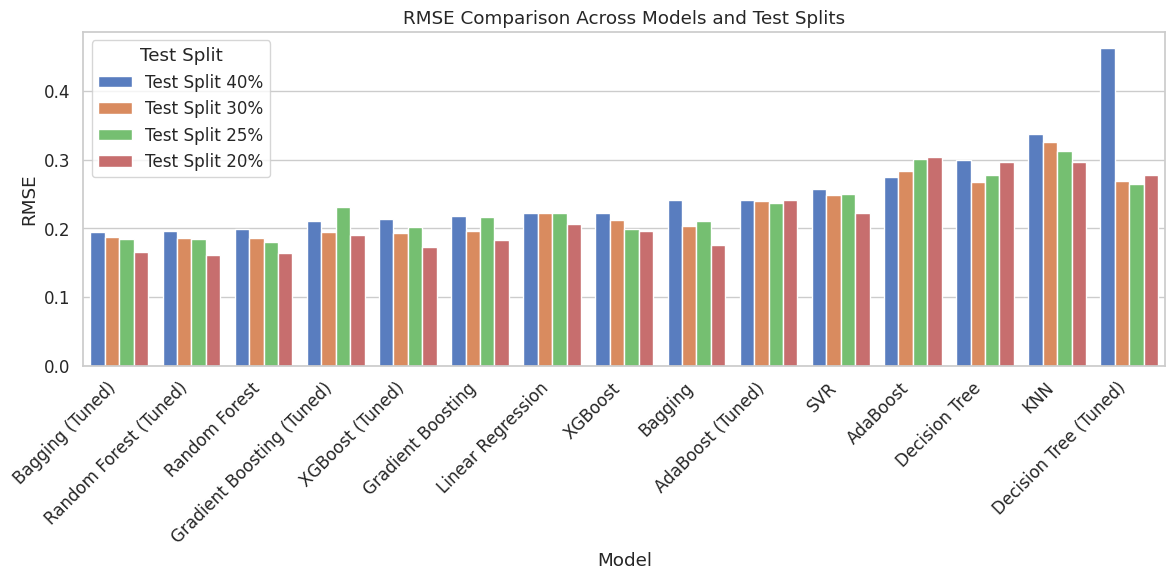

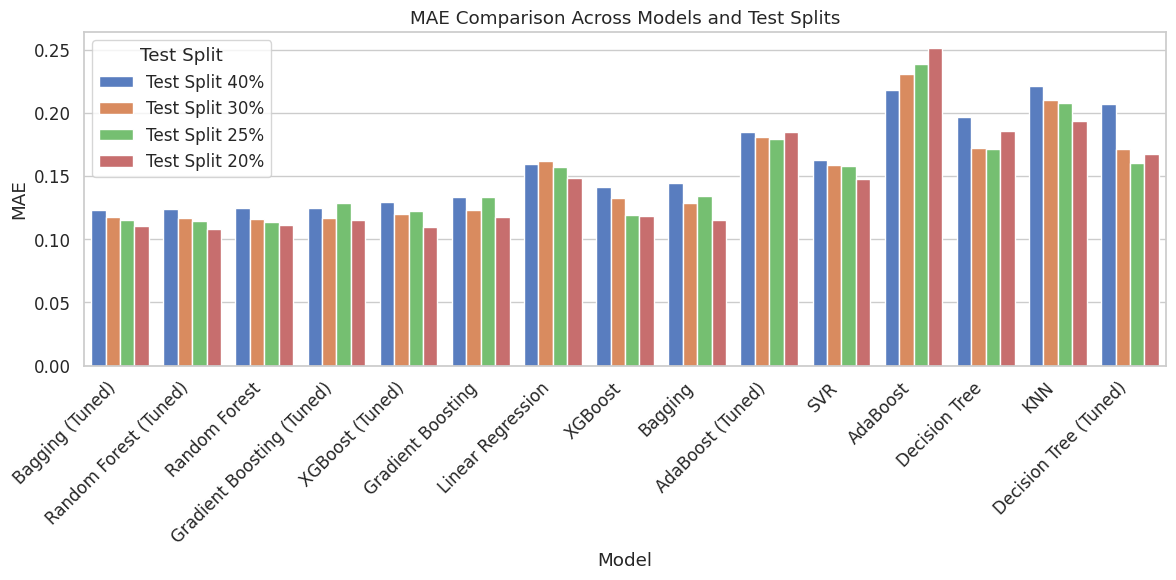

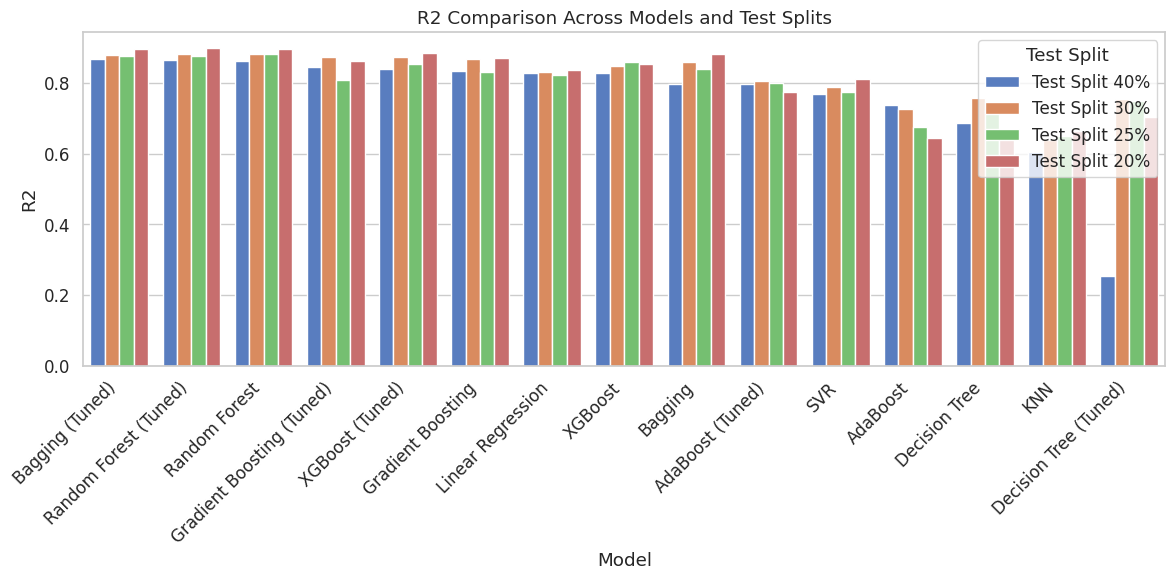

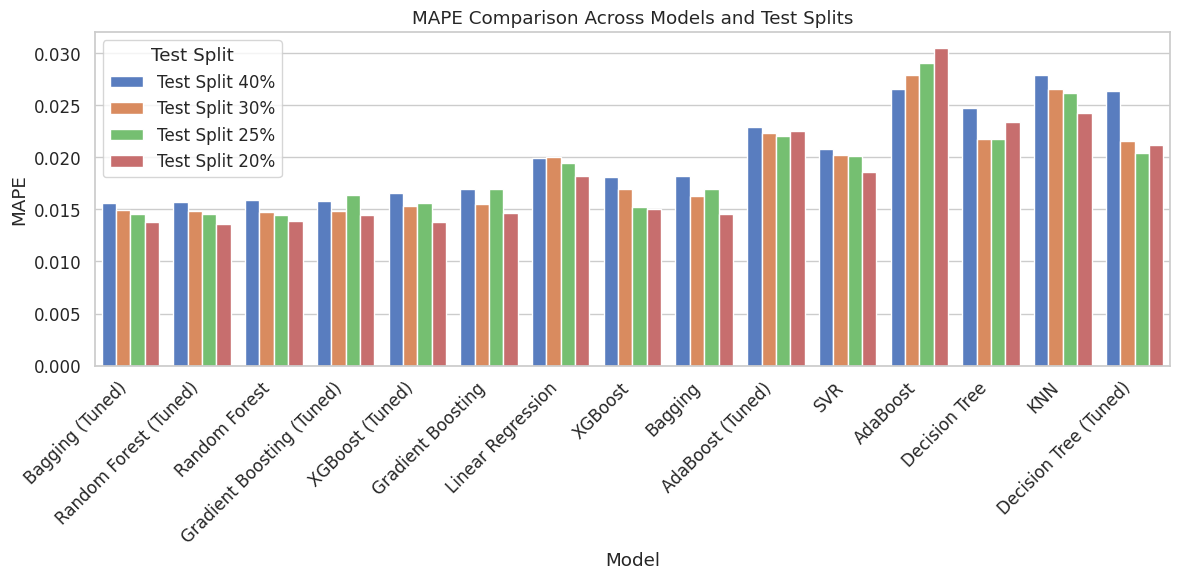

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Collect all results
results_dict = {
    "Test Split 40%": results_df40,
    "Test Split 30%": results_df30,
    "Test Split 25%": results_df25,
    "Test Split 20%": results_df20
}

# Combine into single DataFrame
comparison_df = pd.concat(results_dict, axis=0, keys=results_dict.keys())
comparison_df = comparison_df.reset_index(level=0).rename(columns={"level_0": "Test Split"})

# Select numeric performance metrics
numeric_metrics = comparison_df.select_dtypes(include=["number"]).columns

# Plot each metric per model across test splits
for metric in numeric_metrics:
    plt.figure(figsize=(12,6))
    sns.barplot(data=comparison_df, x="Model", y=metric, hue="Test Split")
    plt.title(f"{metric} Comparison Across Models and Test Splits")
    plt.ylabel(metric)
    plt.xlabel("Model")
    plt.xticks(rotation=45, ha="right")
    plt.legend(title="Test Split")
    plt.tight_layout()
    plt.show()


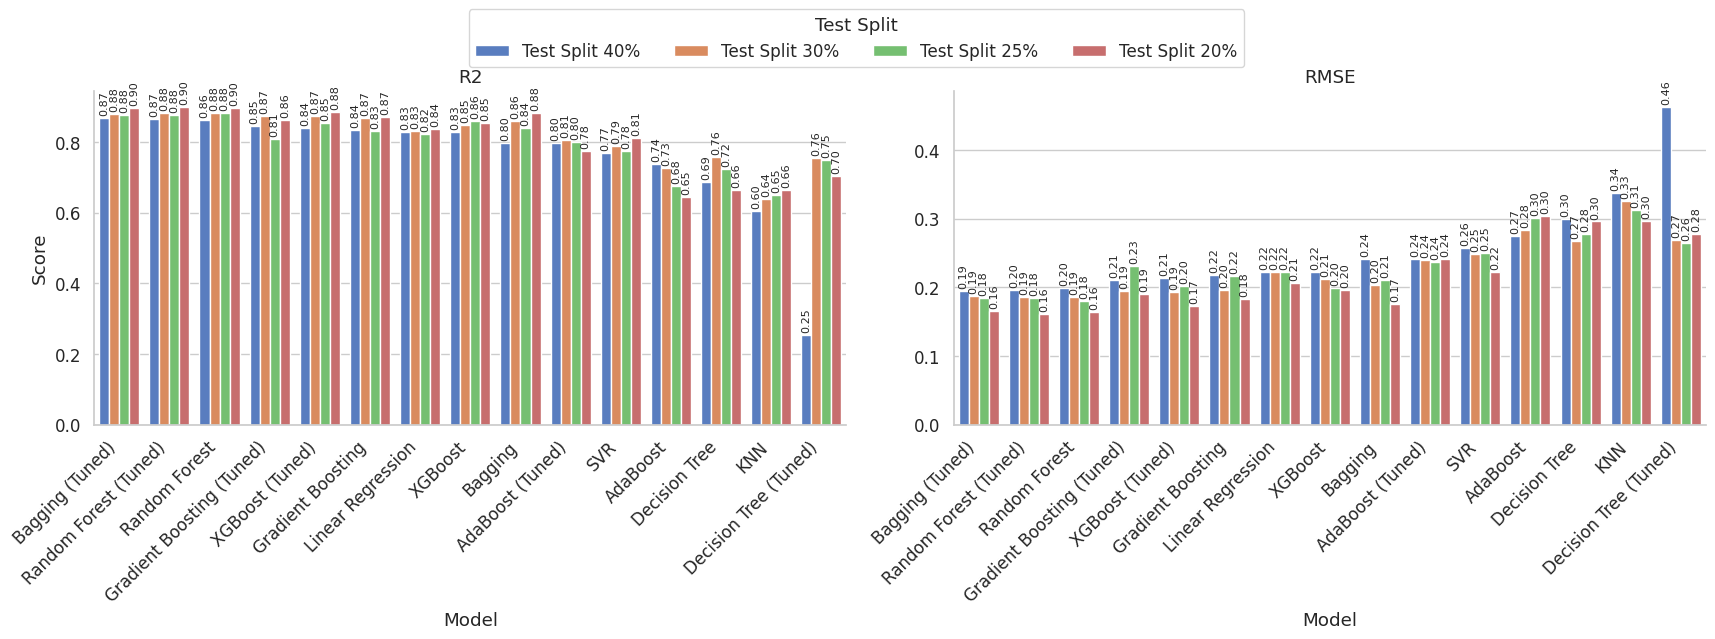

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Dictionary with renamed keys
results_dict = {
    "Test Split 40%": results_df40,
    "Test Split 30%": results_df30,
    "Test Split 25%": results_df25,
    "Test Split 20%": results_df20
}

# Combine results
comparison_df = pd.concat(results_dict, axis=0, keys=results_dict.keys())
comparison_df = comparison_df.reset_index(level=0).rename(columns={"level_0": "Split"})

# Select metrics to plot
metrics_to_plot = ["R2", "RMSE"]  # Make sure these match your DataFrame column names
plot_df = comparison_df.melt(
    id_vars=["Model", "Split"],
    value_vars=metrics_to_plot,
    var_name="Metric",
    value_name="Value"
)

# Create side-by-side plots
g = sns.catplot(
    data=plot_df,
    x="Model", y="Value",
    hue="Split",
    col="Metric",
    kind="bar",
    height=6, aspect=1.3,
    sharey=False
)

# Rotate x-labels and set titles
g.set_xticklabels(rotation=45, ha="right")
g.set_axis_labels("Model", "Score")
g.set_titles("{col_name}")

# --- FIX LEGEND ---
# Remove the default legend
g._legend.remove()

# Add a new legend above the plots
g.fig.legend(
    title="Test Split",
    loc="upper center",
    bbox_to_anchor=(0.5, 1.08),
    ncol=4
)

# Add numbers on top of bars
for ax in g.axes.flat:
    for container in ax.containers:
        ax.bar_label(container, fmt="%.2f", label_type="edge", fontsize=8, rotation=90, padding=2)

plt.tight_layout()
plt.show()
